# Reza Torabi 610300032

## Exploring Customer Churn Data with EDA

### Step 1: Load and Inspect the Data

#### 1. Load the Data

First we read the CSV file into a DataFrame.

In [ ]:
df <- read.csv("/content/churn.csv")
library(tidyverse)
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)
library(dplyr)

#### 2. Inspect the Structure

Now we check the number of rows and columns, data
types of each column, and the first few rows of the dataset.

In [ ]:
glimpse(df)

Rows: 3,333
Columns: 21
$ State          <chr> "KS", "OH", "NJ", "OH", "OK", "AL", "MA", "MO", "LA", "…
$ Account.Length <int> 128, 107, 137, 84, 75, 118, 121, 147, 117, 141, 65, 74,…
$ Area.Code      <int> 415, 415, 415, 408, 415, 510, 510, 415, 408, 415, 415, …
$ Phone          <chr> "382-4657", "371-7191", "358-1921", "375-9999", "330-66…
$ Int.l.Plan     <chr> "no", "no", "no", "yes", "yes", "yes", "no", "yes", "no…
$ VMail.Plan     <chr> "yes", "yes", "no", "no", "no", "no", "yes", "no", "no"…
$ VMail.Message  <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, 0, 0, 0, 27,…
$ Day.Mins       <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218.2, 157.0,…
$ Day.Calls      <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84, 137, 127, 9…
$ Day.Charge     <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 37.09, 26.69,…
$ Eve.Mins       <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348.5, 103.1, …
$ Eve.Calls      <int> 99, 103, 110, 88, 122, 101, 108, 94, 80, 111, 83, 148, …
$ Eve.Charge    

In [ ]:
head(df, n = 10)

,State,Account.Length,Area.Code,Phone,Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,Day.Charge,⋯,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn.
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,⋯,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,⋯,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
3,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,⋯,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
4,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,⋯,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
5,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,⋯,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
6,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,⋯,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
7,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,⋯,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
8,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,⋯,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
9,LA,117,408,335-4719,no,no,0,184.5,97,31.37,⋯,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.


#### 3. Questions
* **What types of variables are in the dataset (e.g., numerical, categorical)?**<br>

We have both numerical and categorical variables. Categorical variables such as state, phone, Area.Code, etc. and numerical variables such as Account.Length, vMail.Message, Day.Mins, etc.
* **What are the column names, and what do you think they represent?**<br>

1. _State_: For the 50 states and the District of Columbia<br>
2. _Account Length_: How long account has been active<br>
3. Area code_: The code that represents the area<br>
4. _Phone Number_: Essentially a surrogate for customer ID and is often dropped in analysis since it uniquely identifies each customer without providing useful information for predicting churn<br>
5. _International Plan_: Whether the customer has International Plan or not<br>
6. _Voice Mail Plan_: Whether the customer has Voice Mail Plan or not<br>
7. _Number of Voice Mail Messages_: Numbers of voice mail messages customer had<br>
8. _Total Day Minutes_: Minutes customer used service during the day<br>
9. _Total Day Calls_: Numbers of calls customer had during the day<br>
10. _Total Day Charge_: Perhaps based on above two variables<br>
11. _Total Eve Minutes_: Minutes customer used service during the
evening<br>
12. _Total Eve Calls_: Numbers of calls customer had during the evening<br>
13. _Total Eve Charge_: Perhaps based on above two variables<br>
14. _Total Night Minutes_: Minutes customer used service during the
night<br>
15. _Total Night Calls_: Numbers of calls customer had during the night<br>
16. _Total Night Charge_: Perhaps based on above two variables<br>
17. _Total International Minutes_: Minutes customer used service to
make international calls<br>
18. _Total International Calls_: Numbers of international calls customer had<br>
19. _Total International Charge_: Perhaps based on above two variables<br>
20. _Number of Calls to Customer Service_: Numbers of calls customer had with customer service<br>
21. _Churn_: Target. Indicator of whether the customer has left the company (True
or False)<br>


In [ ]:
df$Phone <- NULL
head(df)

,State,Account.Length,Area.Code,Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn.
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
2,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
3,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
4,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
5,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
6,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


### Step 2: Data Cleaning

#### 1. Check for Missing Values

We identify missing values in the dataset and check if any column has a high percentage of missing values.

In [ ]:
colSums(is.na(df))

State Account.Length      Area.Code     Int.l.Plan     VMail.Plan 
             0              0              0              0              0 
 VMail.Message       Day.Mins      Day.Calls     Day.Charge       Eve.Mins 
             0              0              0              0              0 
     Eve.Calls     Eve.Charge     Night.Mins    Night.Calls   Night.Charge 
             0              0              0              0              0 
     Intl.Mins     Intl.Calls    Intl.Charge CustServ.Calls         Churn. 
             0              0              0              0              0

In [ ]:
for (i in 1:dim(df)[1]) {
    for (j in 1:dim(df)[2]) {
        if (df[i, j] == "") {
            print(i)
        }
    }
}

It seems that there are no missing values in the dataset.

#### 2. Check for Duplicates

Now we check if there are duplicate rows.

In [ ]:
duplicates <- df[duplicated(df), ]
print(duplicates)

 [1] State          Account.Length Area.Code      Int.l.Plan     VMail.Plan    
 [6] VMail.Message  Day.Mins       Day.Calls      Day.Charge     Eve.Mins      
[11] Eve.Calls      Eve.Charge     Night.Mins     Night.Calls    Night.Charge  
[16] Intl.Mins      Intl.Calls     Intl.Charge    CustServ.Calls Churn.        
<0 rows> (or 0-length row.names)


We can see that there are no duplicate rows in our dataset.

#### 3. Data Types

We check to see if all variables have suitable datatypes.

In [ ]:
str(df)

'data.frame':	3333 obs. of  20 variables:
 $ State         : chr  "KS" "OH" "NJ" "OH" ...
 $ Account.Length: int  128 107 137 84 75 118 121 147 117 141 ...
 $ Area.Code     : int  415 415 415 408 415 510 510 415 408 415 ...
 $ Int.l.Plan    : chr  "no" "no" "no" "yes" ...
 $ VMail.Plan    : chr  "yes" "yes" "no" "no" ...
 $ VMail.Message : int  25 26 0 0 0 0 24 0 0 37 ...
 $ Day.Mins      : num  265 162 243 299 167 ...
 $ Day.Calls     : int  110 123 114 71 113 98 88 79 97 84 ...
 $ Day.Charge    : num  45.1 27.5 41.4 50.9 28.3 ...
 $ Eve.Mins      : num  197.4 195.5 121.2 61.9 148.3 ...
 $ Eve.Calls     : int  99 103 110 88 122 101 108 94 80 111 ...
 $ Eve.Charge    : num  16.78 16.62 10.3 5.26 12.61 ...
 $ Night.Mins    : num  245 254 163 197 187 ...
 $ Night.Calls   : int  91 103 104 89 121 118 118 96 90 97 ...
 $ Night.Charge  : num  11.01 11.45 7.32 8.86 8.41 ...
 $ Intl.Mins     : num  10 13.7 12.2 6.6 10.1 6.3 7.5 7.1 8.7 11.2 ...
 $ Intl.Calls    : int  3 3 5 7 3 6 7 6 4 5 ...


We see that each column has an appropriate datatype.

In [ ]:
ctg_vars <- list("State", "Area.Code", "Int.l.Plan", "VMail.Plan")
num_vars <- list()
for (var in colnames(df)) {
    if (!var %in% ctg_vars & !var == "Churn.") {
        num_vars <- append(num_vars, var)
    }
}
num_vars

[[1]]
[1] "Account.Length"

[[2]]
[1] "VMail.Message"

[[3]]
[1] "Day.Mins"

[[4]]
[1] "Day.Calls"

[[5]]
[1] "Day.Charge"

[[6]]
[1] "Eve.Mins"

[[7]]
[1] "Eve.Calls"

[[8]]
[1] "Eve.Charge"

[[9]]
[1] "Night.Mins"

[[10]]
[1] "Night.Calls"

[[11]]
[1] "Night.Charge"

[[12]]
[1] "Intl.Mins"

[[13]]
[1] "Intl.Calls"

[[14]]
[1] "Intl.Charge"

[[15]]
[1] "CustServ.Calls"

#### 4. Questions

* **Are there any missing values or duplicates? If so, how would you
handle them?**

NO. We have no missing values or duplicates.


* **Are there any columns where the data type needs adjustment?**

No they are all good but later for analysis of the data, we should turn categorical variables to numbers.

### Step 3: Descriptive Statistics

#### 1. Summarize Numerical Features

Now we calculate basic descriptive statistics
(mean, median, standard deviation) for numerical columns.

In [ ]:
for (var in num_vars) {
    print(var)
    print(summary(df[, var]))
    cat("\n")
}

[1] "Account.Length"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    74.0   101.0   101.1   127.0   243.0 

[1] "VMail.Message"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   8.099  20.000  51.000 

[1] "Day.Mins"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   143.7   179.4   179.8   216.4   350.8 

[1] "Day.Calls"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    87.0   101.0   100.4   114.0   165.0 

[1] "Day.Charge"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   24.43   30.50   30.56   36.79   59.64 

[1] "Eve.Mins"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   166.6   201.4   201.0   235.3   363.7 

[1] "Eve.Calls"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    87.0   100.0   100.1   114.0   170.0 

[1] "Eve.Charge"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   14.16   17.12   17.08   20.00   30.91 

[1] "Night.Mins"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   23

#### 2. Summarize Categorical Features

Then we check the unique values and their
frequencies for categorical columns.

In [ ]:
for (var in ctg_vars) {
    print(var)
    print(table(df[, var]))
    cat("\n")
}

[1] "State"

 AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA 
 52  80  55  64  34  66  74  54  61  63  54  53  44  73  58  71  70  59  51  65 
 MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI 
 70  62  73  84  63  65  68  68  62  61  56  68  62  66  83  78  61  78  45  65 
 SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY 
 60  60  53  72  72  77  73  66  78 106  77 

[1] "Area.Code"

 408  415  510 
 838 1655  840 

[1] "Int.l.Plan"

  no  yes 
3010  323 

[1] "VMail.Plan"

  no  yes 
2411  922 



#### 3. Questions

* **What do the mean and median tell you about each numerical feature?**

1. _Account Length_: The mean and median are very similar and it means that the distribution of this column is probably normal.
2. _Number of Voice Mail Messages_: The mean is bigger than the median so the data of this column is right-skewed.
3. _Total Day Minutes_: The mean and median are very similar and it means that the distribution of this column is probably normal.
4. _Total Day Calls_: The mean and median are very similar and it means that the distribution of this column is probably normal.
5. _Total Day Charge_: The mean and median are very similar and it means that the distribution of this column is probably normal.
6. _Total Eve Minutes_: The mean and median are very similar and it means that the distribution of this column is probably normal.
7. _Total Eve Calls_: The mean and median are very similar and it means that the distribution of this column is probably normal.
8. _Total Eve Charge_: The mean and median are very similar and it means that the distribution of this column is probably normal.
9. _Total Night Minutes_: The mean and median are very similar and it means that the distribution of this column is probably normal.
10. _Total Night Calls_: The mean and median are very similar and it means that the distribution of this column is probably normal.
11. _Total Night Charge_: The mean and median are very similar and it means that the distribution of this column is probably normal.
12. _Total International Minutes_: The mean and median are very similar and it means that the distribution of this column is probably normal.
13. _Total International Calls_: The mean and median are almost similar and it means that the distribution of this column is probably normal.
14. _Total International Charge_: The mean and median are very similar and it means that the distribution of this column is probably normal.
25. _Number of Calls to Customer Service_: The mean and median are almost similar and it means that the distribution of this column is probably normal but it could be a little right-skewed.

* **How are the values distributed in categorical columns?**

1. _State:_ The distribution is almost evenly spread out, with some states like **WV** having a higher count (106) compared to others like **CA** (34).
2. _Area.Code:_ **408** appears 838 times (around 27% of the total entries). **415** appears 1655 times (approximately 53%), making it the most common area code. **510** appears 840 times (about 27%). **415** is the predominant area code, accounting for over half of the entries, while **408** and **510** are almost equally represented.
3. _Int.l.Plan:_ **no** appears 3010 times, making up about 90% of the entries. **yes** appears 323 times, about 10%. The majority of customers (90%) do not have an international plan, indicating a strong imbalance in this column.
4. _VMail.Plan:_ **no** appears 2411 times, approximately 72% of the entries. **yes** appears 922 times, around 28%. A majority (72%) of customers do not have a voicemail plan, but the distribution is less imbalanced than the Int.l.Plan column.
5. _Chern:_ **False.** appears 2850 times, or roughly 85%. **True.** appears 483 times, or about 15%. Most customers (85%) have not churned, indicating a lower churn rate in this dataset.


### Step 4: Univariate Analysis

#### 1. Visualize Distributions

In this section we plot histograms for numerical features and bar plots for categorical features.

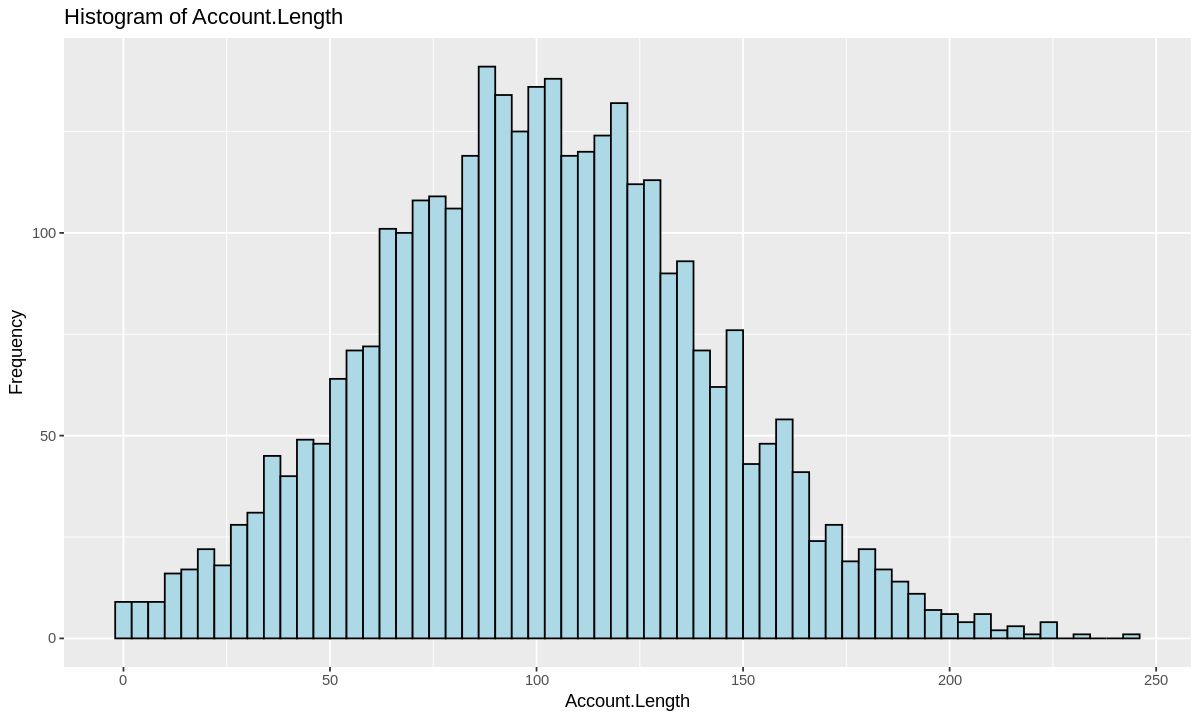

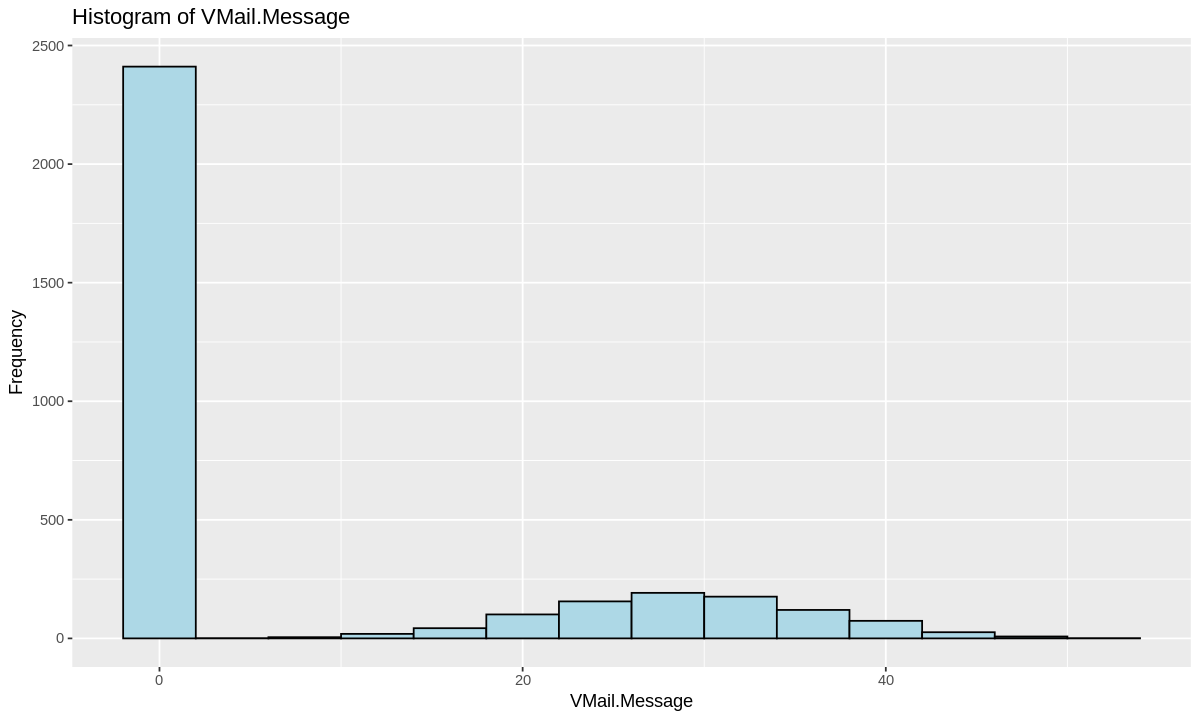

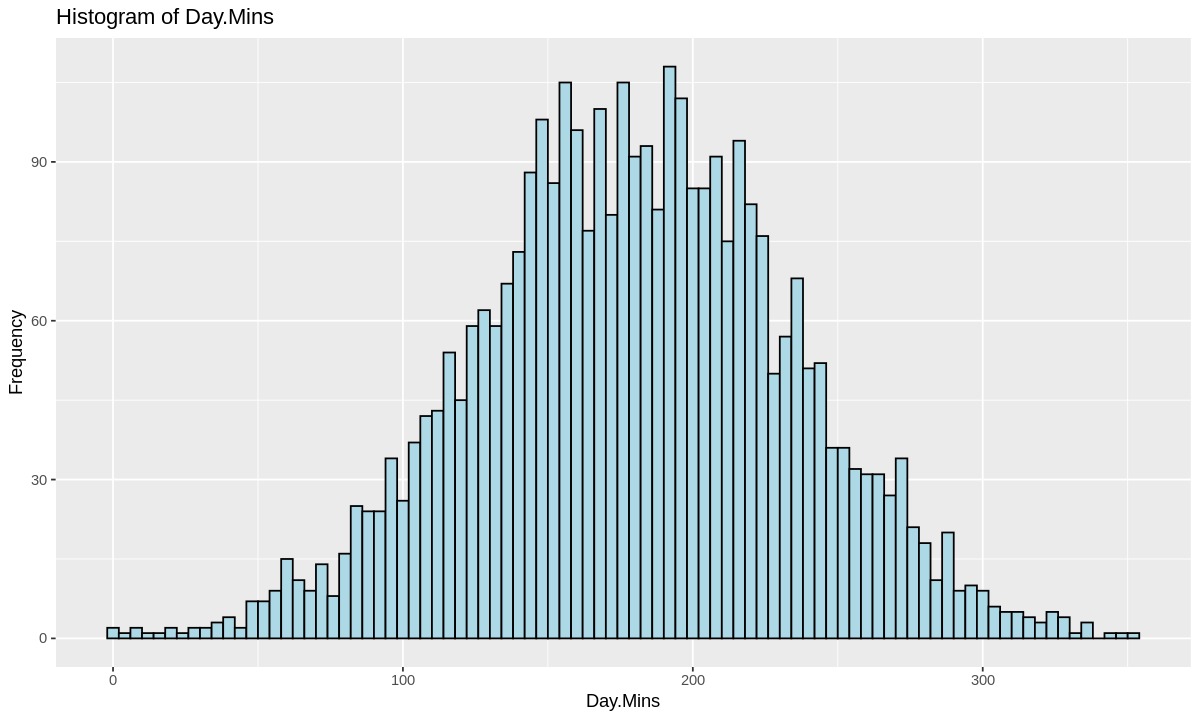

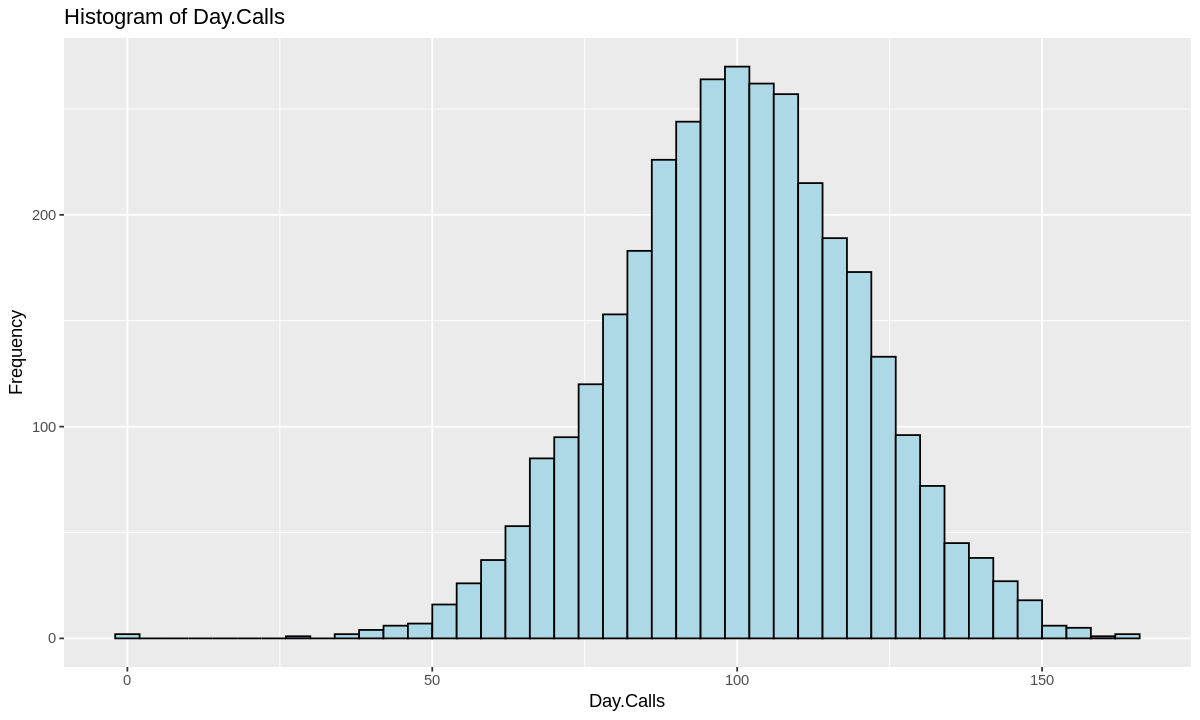

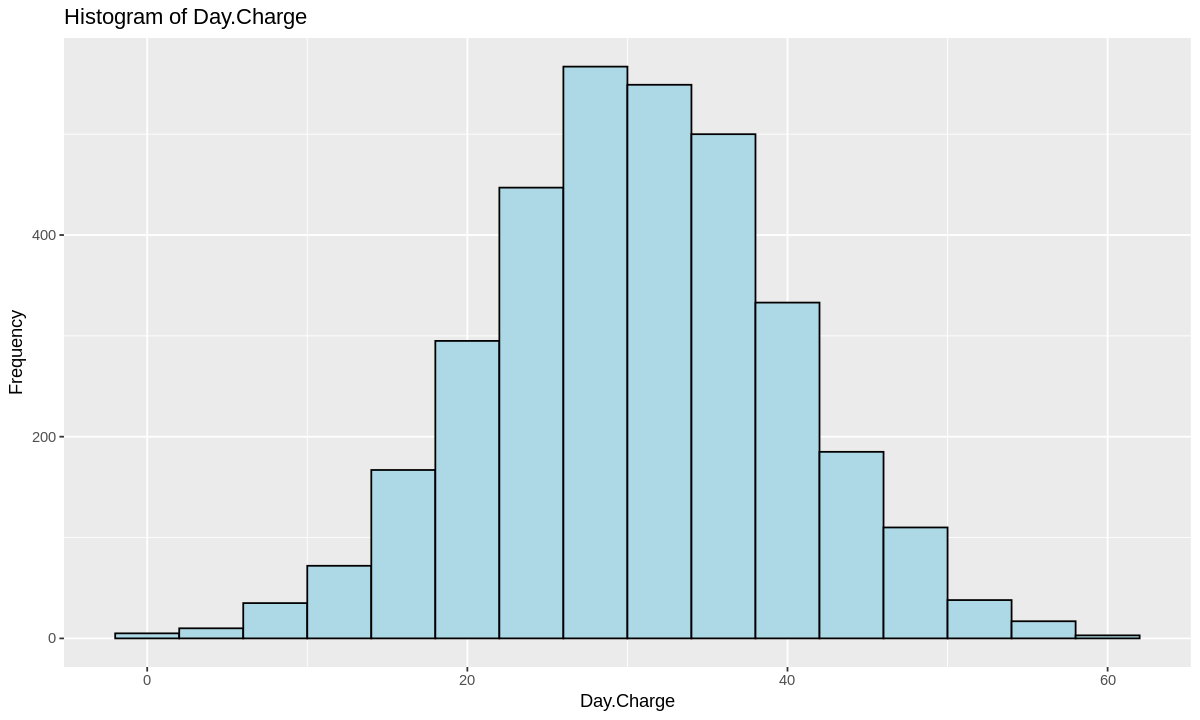

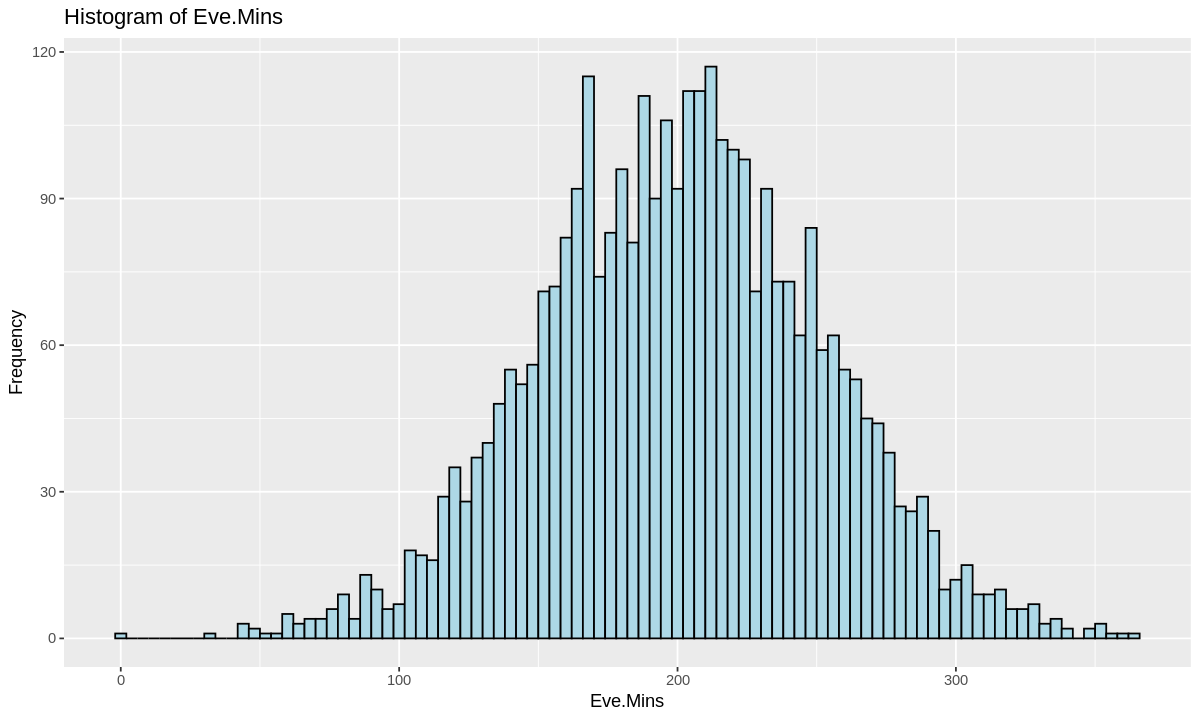

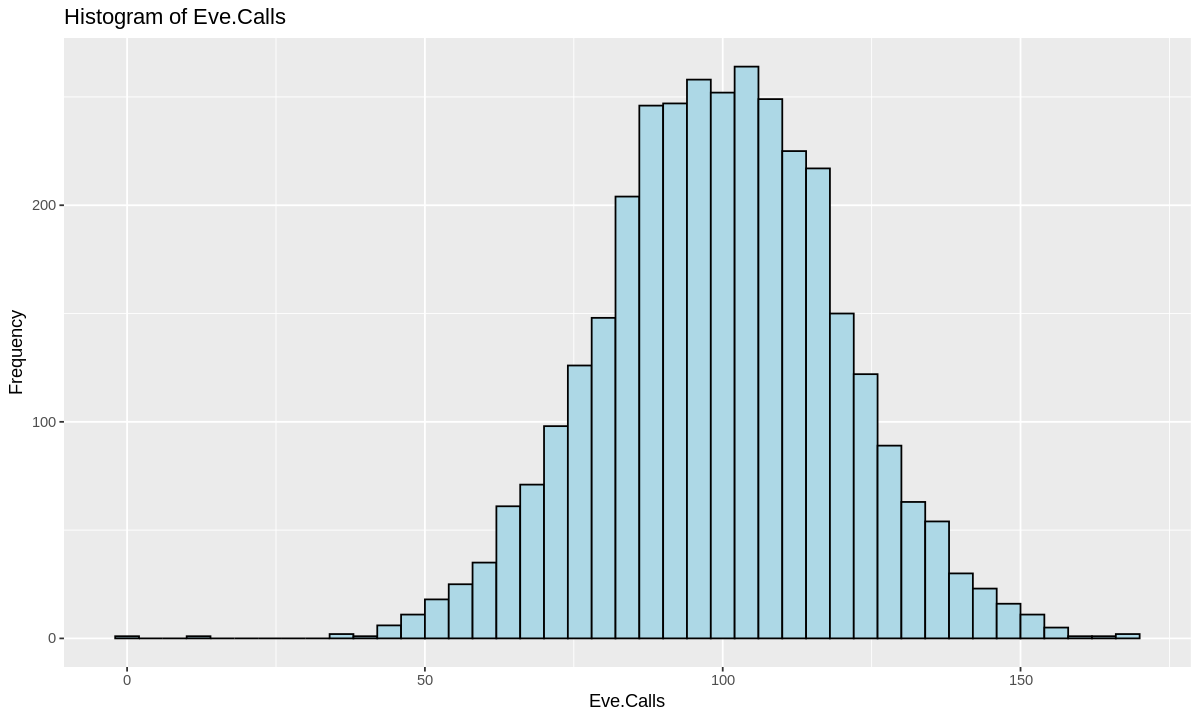

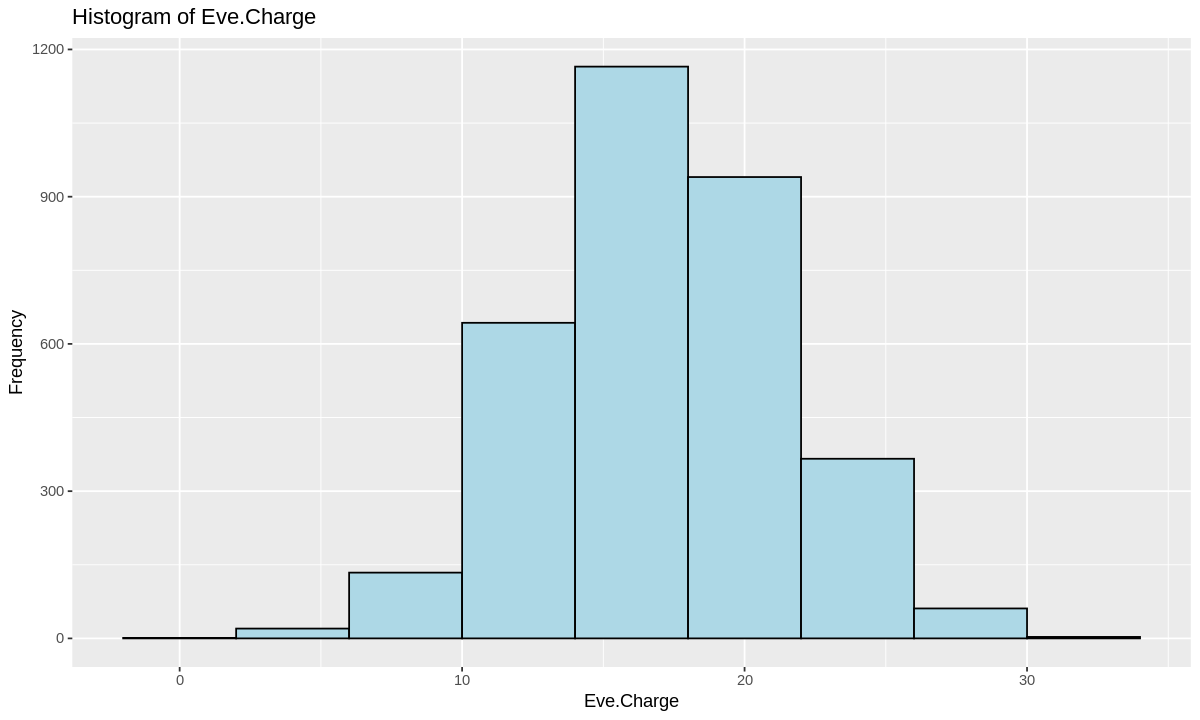

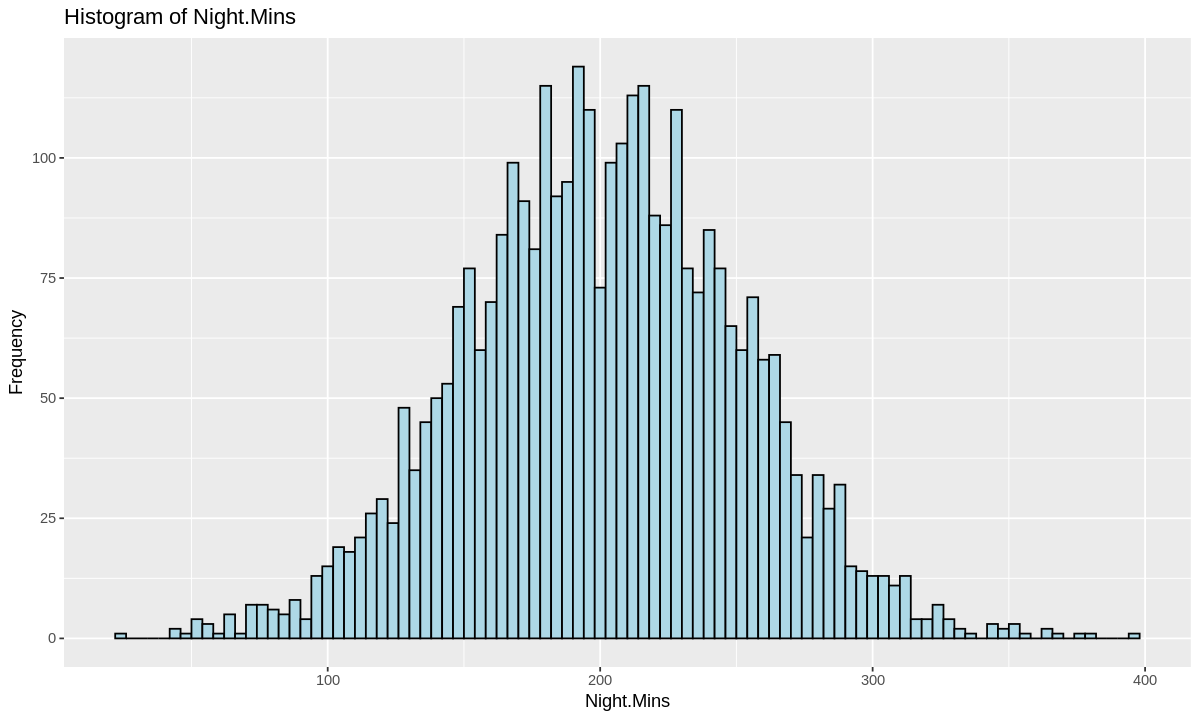

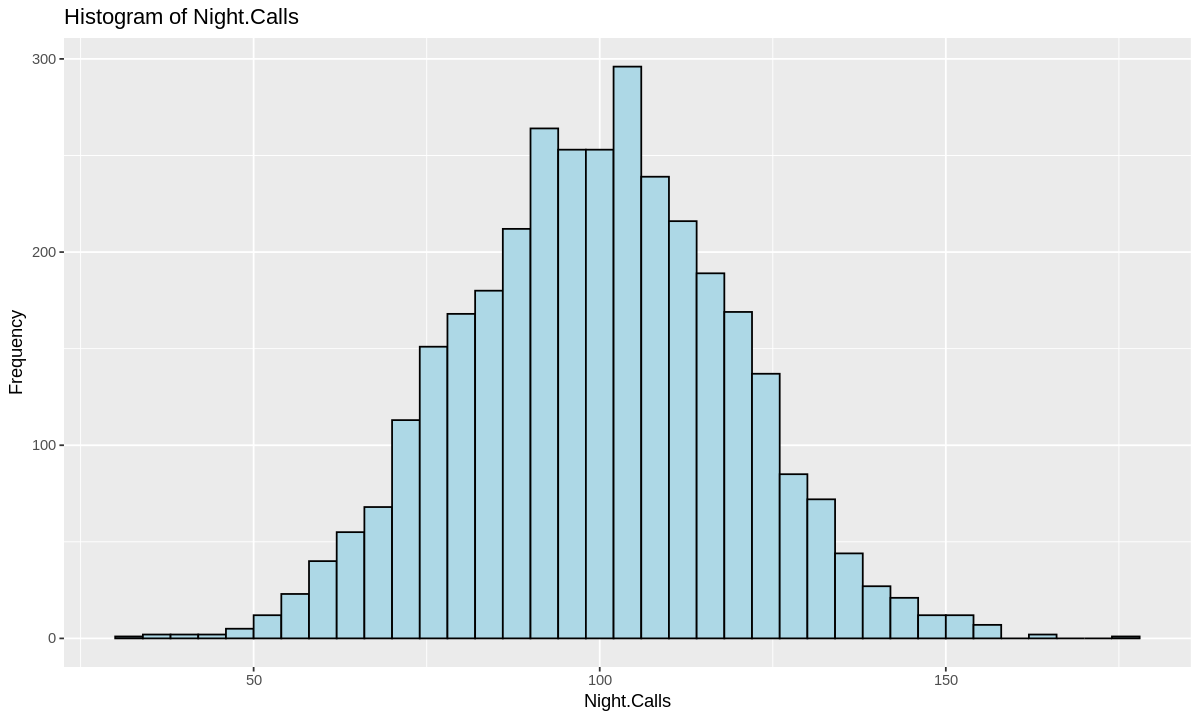

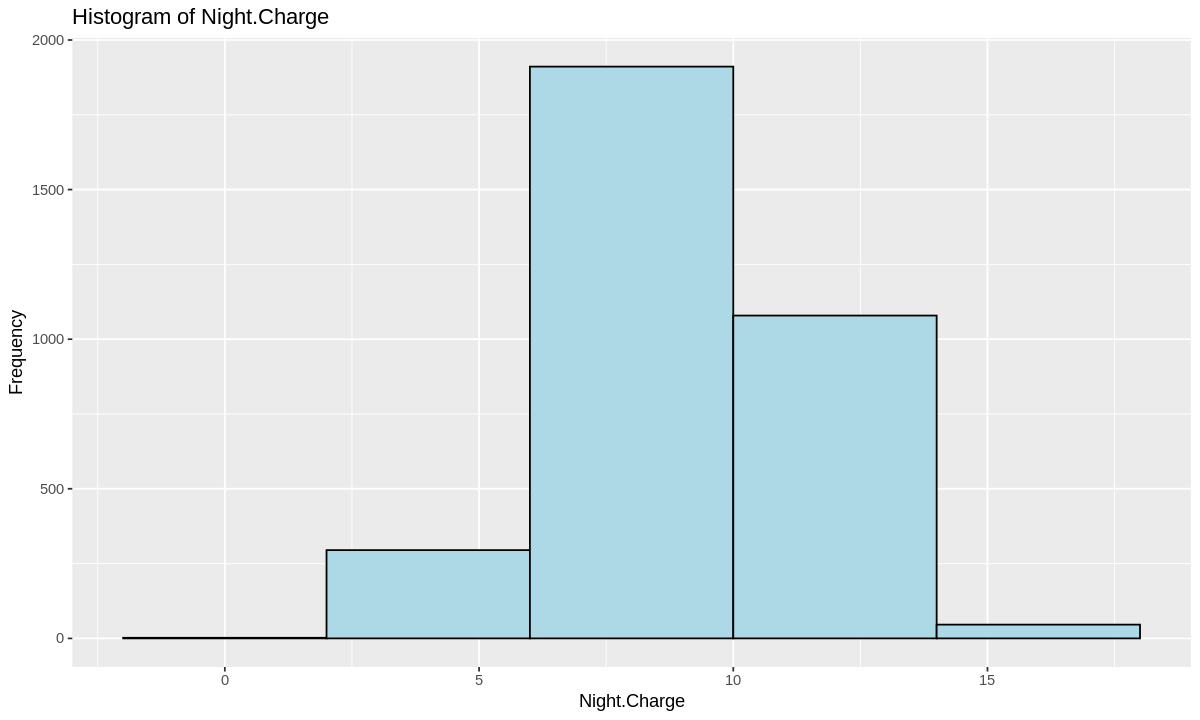

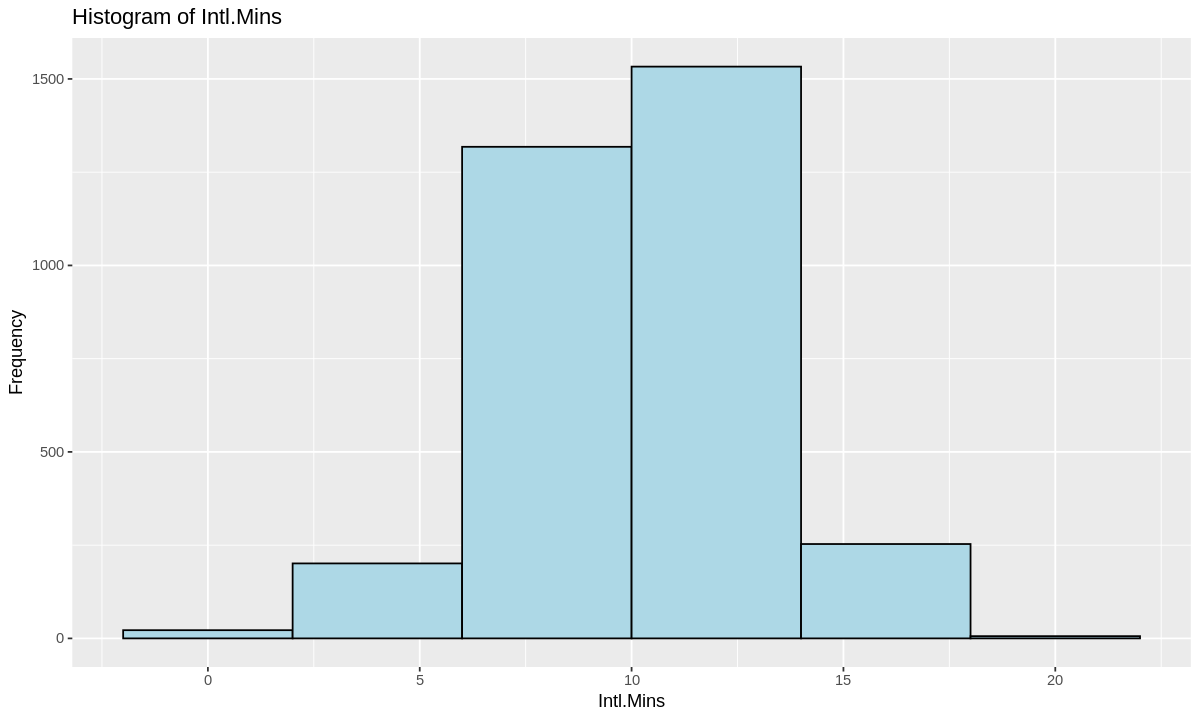

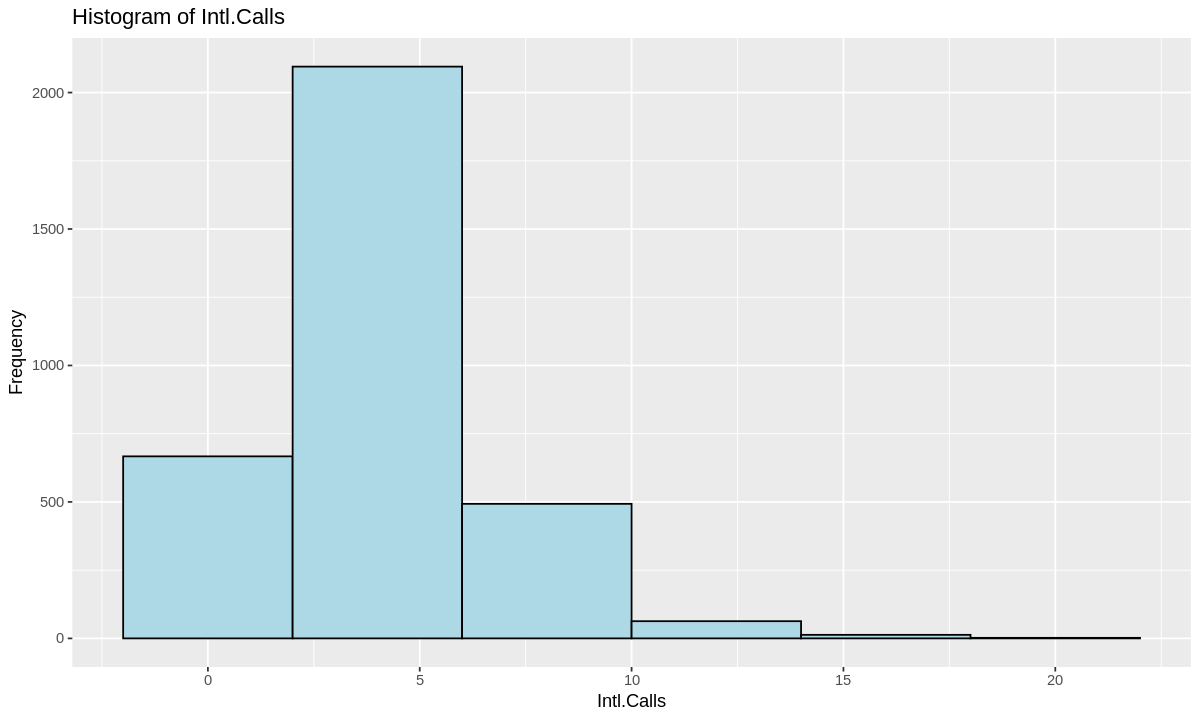

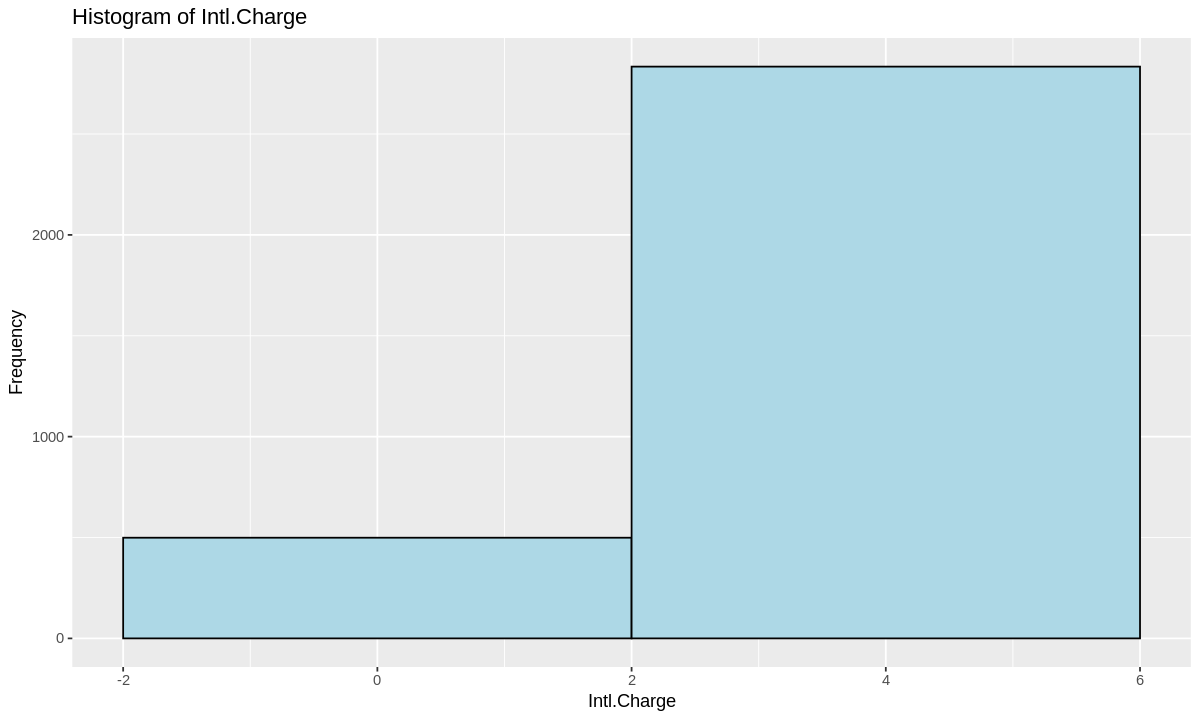

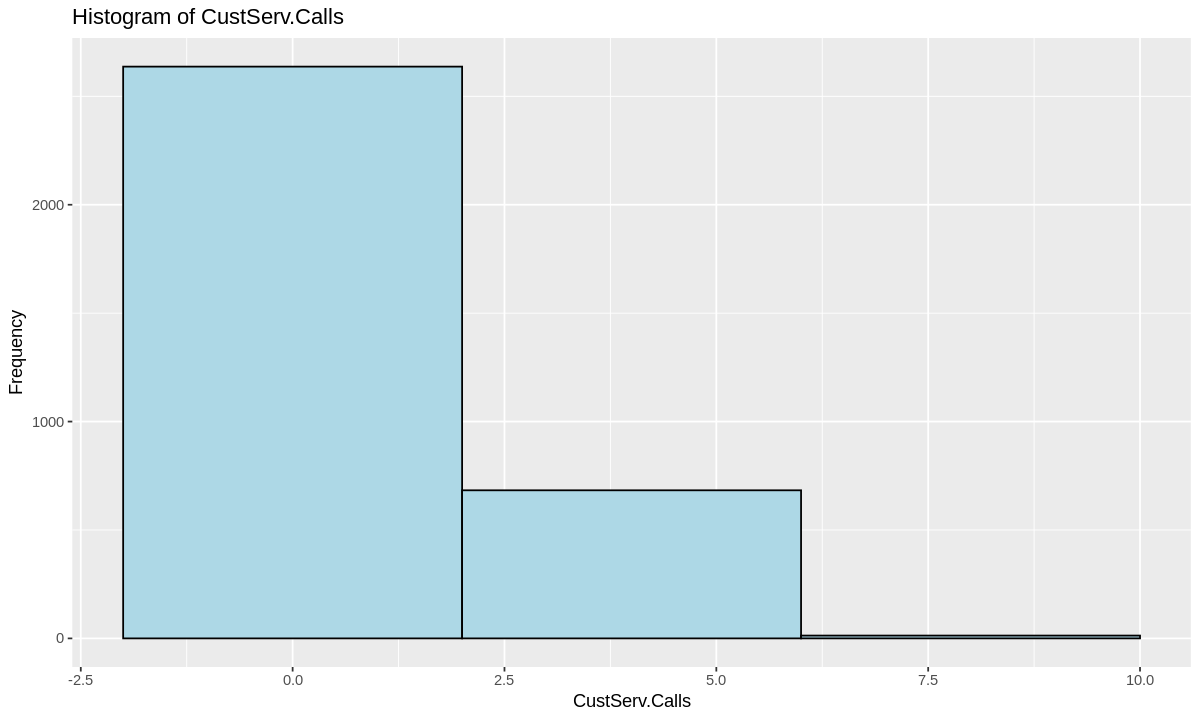

In [ ]:
for (var in num_vars) {
    plt <- ggplot(df, aes_string(x = var)) +
        geom_histogram(binwidth = 4, fill = "lightblue", color = "black") +
        ggtitle(paste("Histogram of", var)) +
        xlab(var) +
        ylab("Frequency")
    print(plt)
}

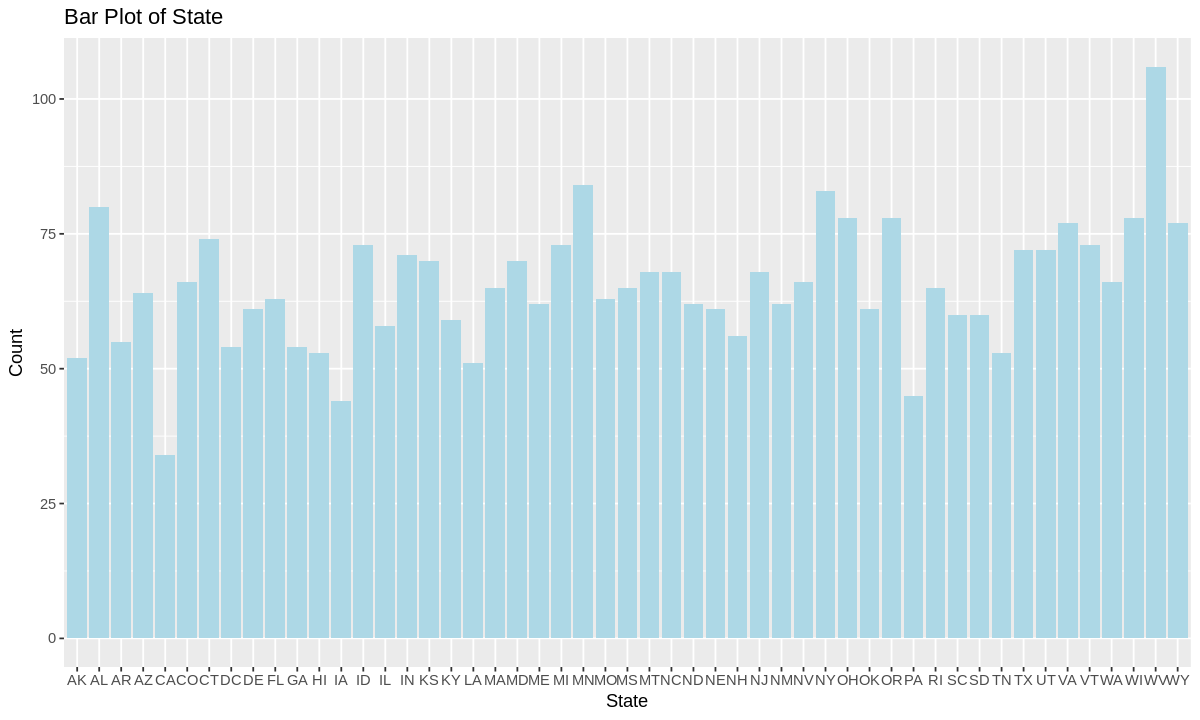

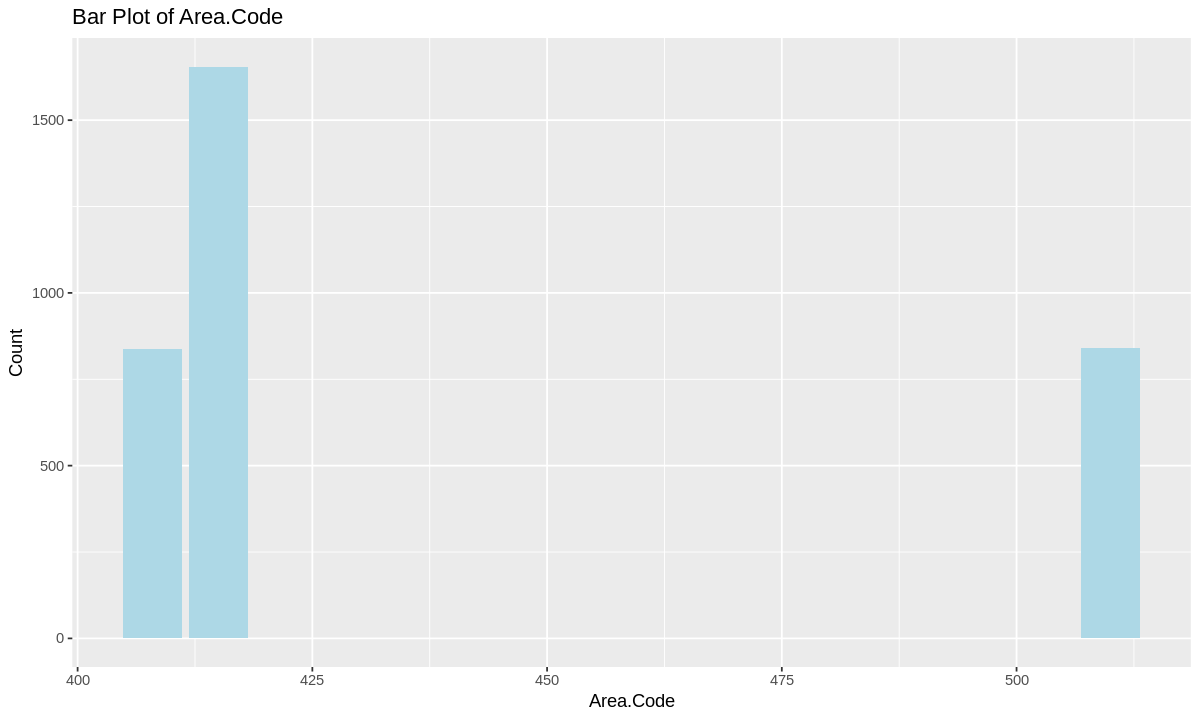

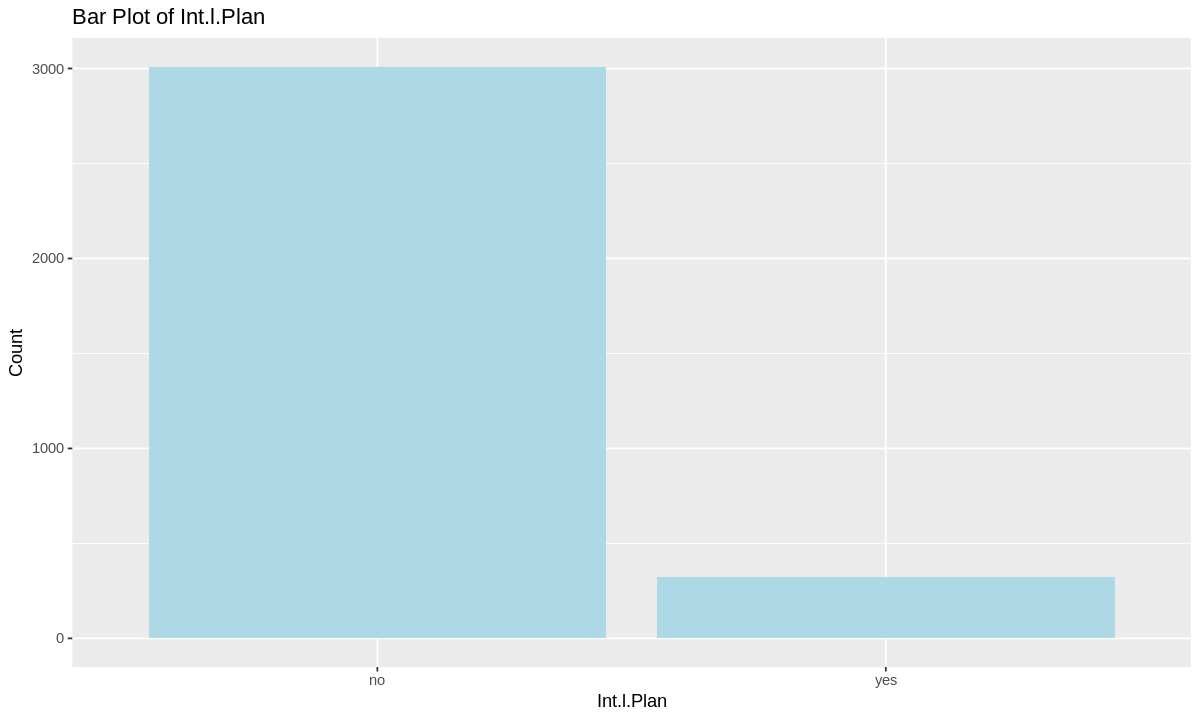

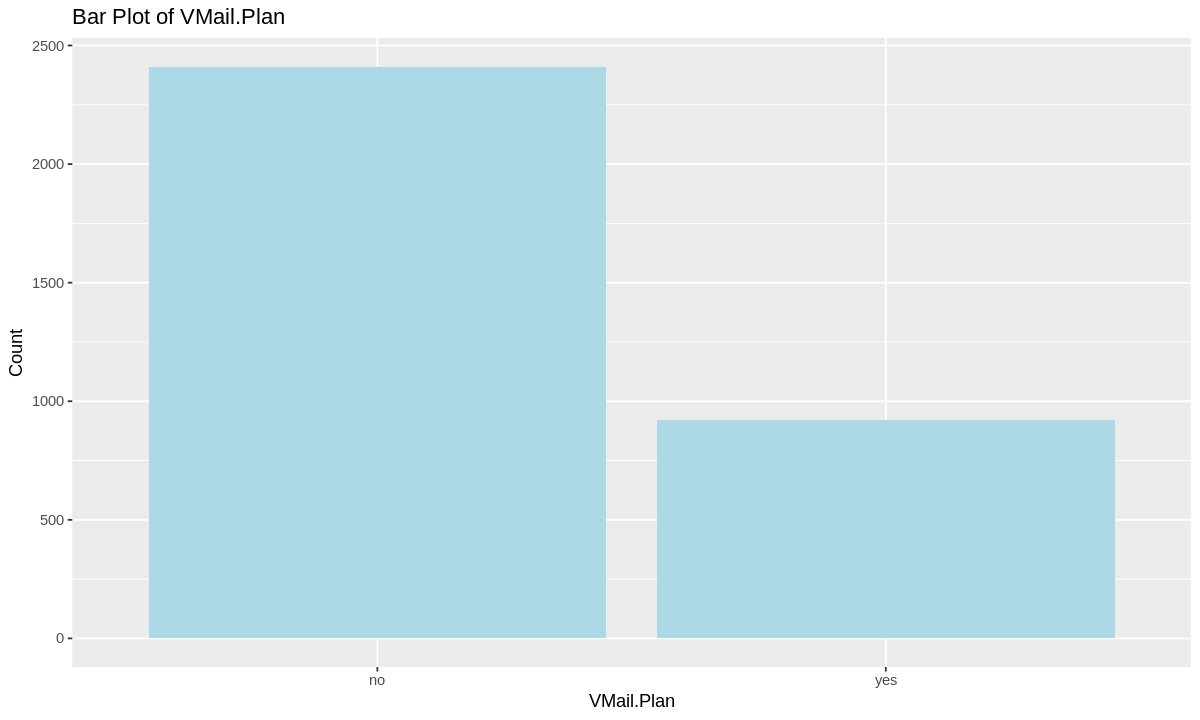

In [ ]:
for (var in ctg_vars) {
    plt <- ggplot(df, aes_string(x = var)) +
        geom_bar(fill = "lightblue") +
        ggtitle(paste("Bar Plot of", var)) +
        xlab(var) +
        ylab("Count")
    print(plt)
}

#### 2. Analyze Churn Rate

Now we plot the churn rate to understand the proportion
of customers who have churned versus retained.

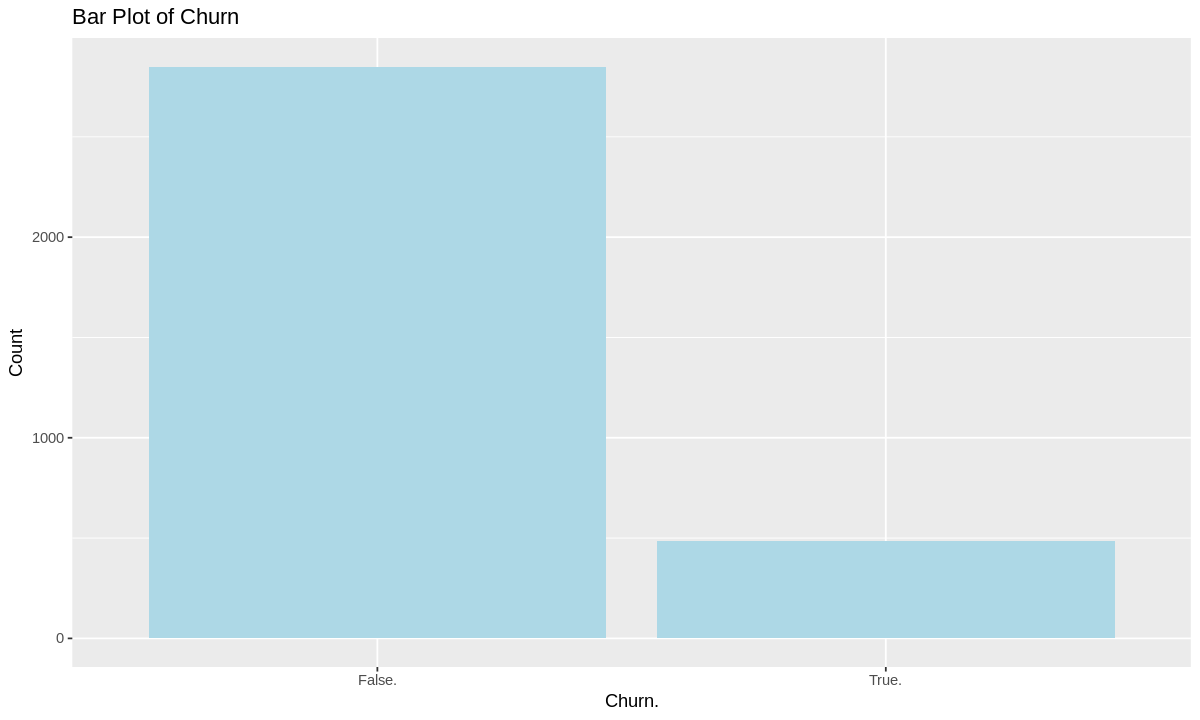

In [ ]:
ggplot(df, aes(x = Churn.)) +
    geom_bar(fill = "lightblue") +
    ggtitle("Bar Plot of Churn") +
    xlab("Churn.") +
    ylab("Count")

#### 3. Questions

* **What is the churn rate, and what does it tell you about the customer
base?**<br>

The churn rate is almost 15%. It indicates that a majority of customers (85%) are staying with the company, which suggests a generally healthy retention level but also room for improvement. While this is not extremely high, it does indicate that a segment of customers may not be fully satisfied or are finding alternatives.

* **Are there any features that show skewness or unusual patterns?**

In VMail.Message column, we can see that most of the customers had no VMail.Message and the nuber for them is zero and it made the distibution unnormal. Also we can see a left-skeweness in Intl.Calls.



### Step 5: Bivariate Analysis

#### 1. Service Plans vs. Churn

It's time to plot the churn rate against service plans
(Int'l Plan, VMail Plan) to see if customers with certain plans have
higher churn rates.

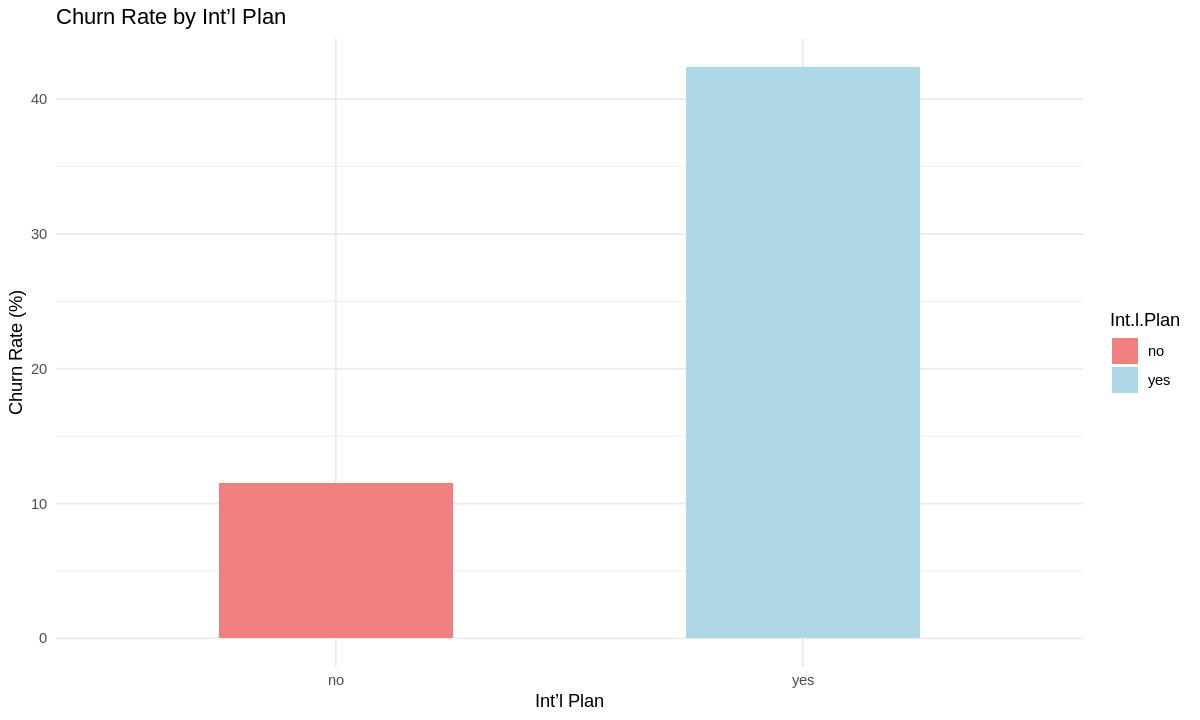

In [ ]:
churn_by_intl_plan <- df %>%
  group_by(Int.l.Plan) %>%
  summarize(churn_rate = mean(Churn. == "True.") * 100)

  ggplot(churn_by_intl_plan, aes(x = Int.l.Plan, y = churn_rate, fill = Int.l.Plan)) +
  geom_bar(stat = "identity", width = 0.5) +
  ggtitle("Churn Rate by Int’l Plan") +
  xlab("Int’l Plan") +
  ylab("Churn Rate (%)") +
  scale_fill_manual(values = c("lightcoral", "lightblue")) +
  theme_minimal()

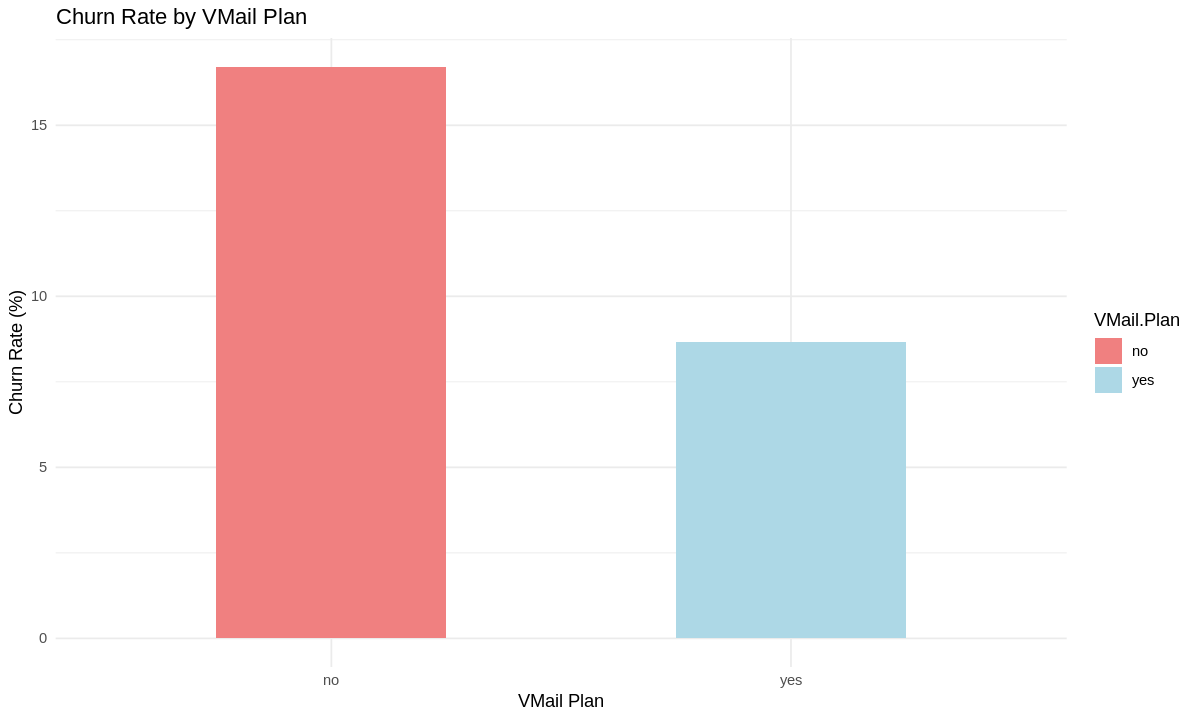

In [ ]:
churn_by_vmail_plan <- df %>%
  group_by(VMail.Plan) %>%
  summarize(churn_rate = mean(Churn. == "True.") * 100)

ggplot(churn_by_vmail_plan, aes(x = VMail.Plan, y = churn_rate, fill = VMail.Plan)) +
  geom_bar(stat = "identity", width = 0.5) +
  ggtitle("Churn Rate by VMail Plan") +
  xlab("VMail Plan") +
  ylab("Churn Rate (%)") +
  scale_fill_manual(values = c("lightcoral", "lightblue")) +
  theme_minimal()

#### 2. Customer Service Calls vs. Churn

We visualize the number of customer
service calls segmented by churn status.

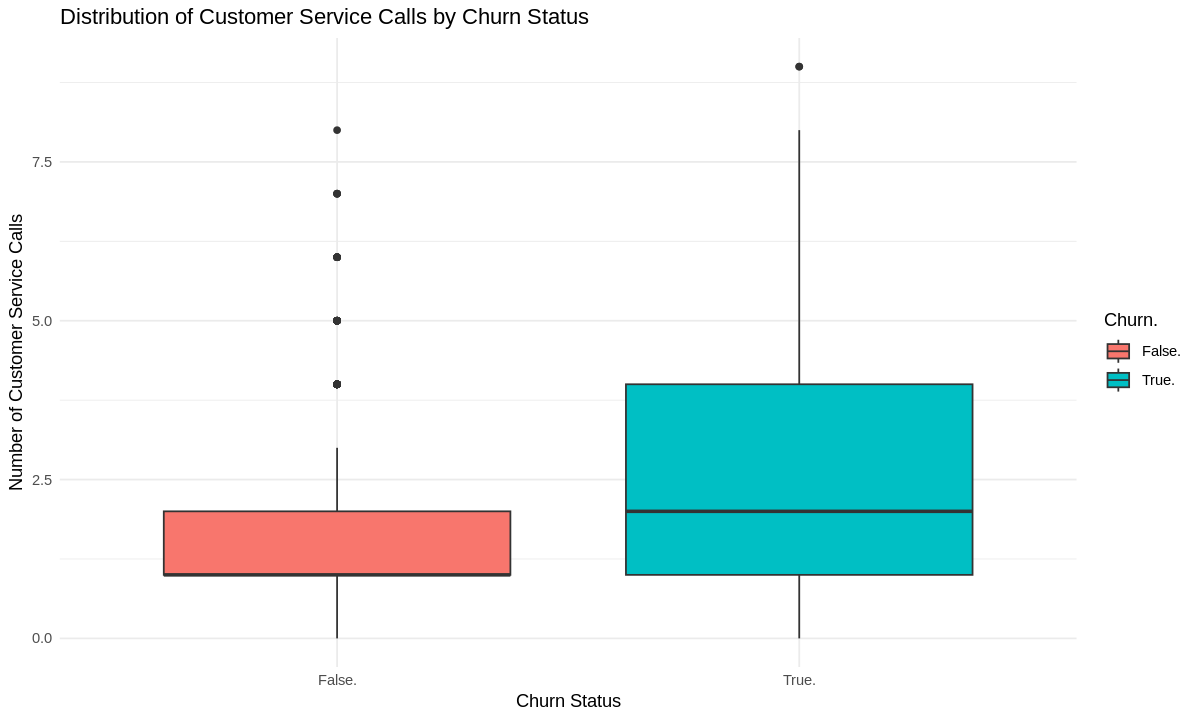

In [ ]:
ggplot(df, aes(x = Churn., y = CustServ.Calls, fill = Churn.)) +
  geom_boxplot() +
  labs(title = "Distribution of Customer Service Calls by Churn Status",
       x = "Churn Status", y = "Number of Customer Service Calls") +
  theme_minimal()

#### 3. Usage and Churn

Then we compare distributions of high-usage metrics (e.g.,
Day Mins, Intl Mins) between churned and non-churned customers.

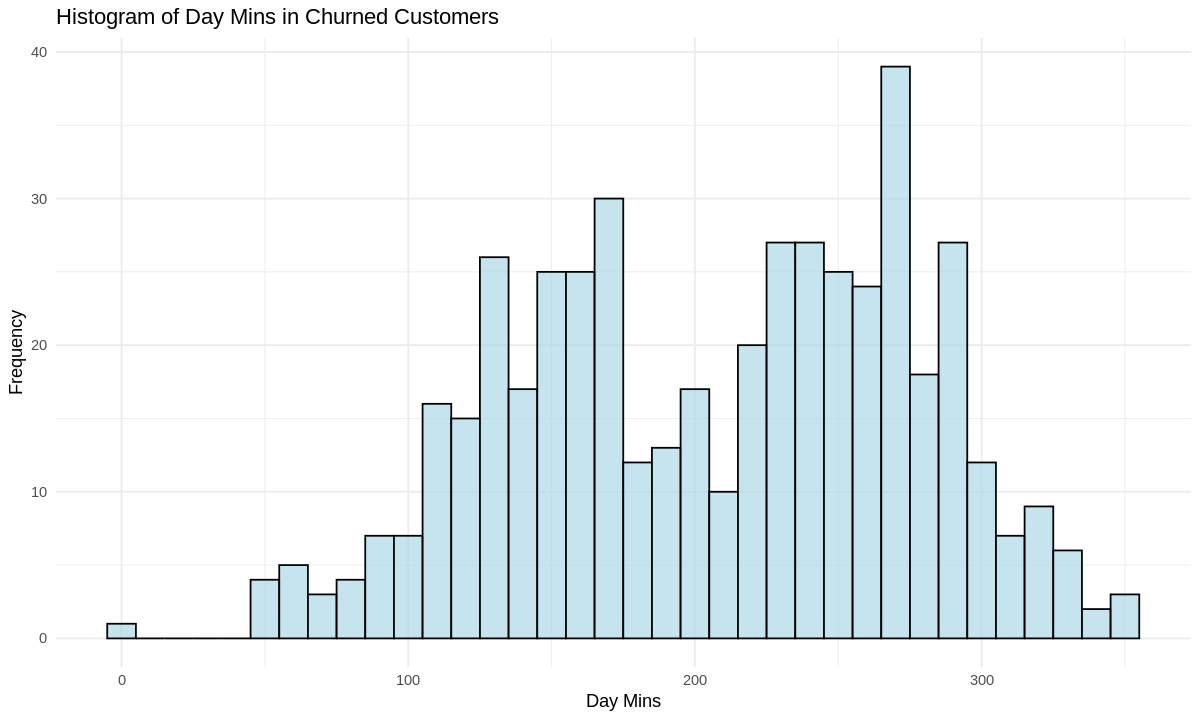

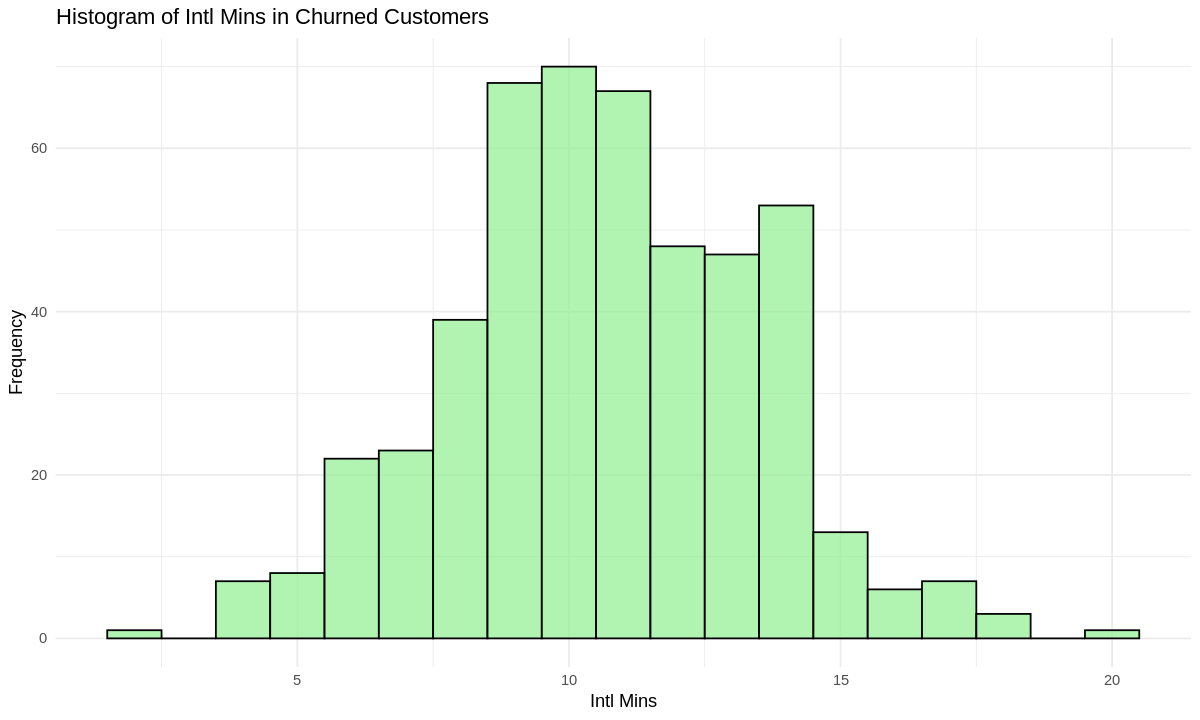

In [ ]:
churned_df <- df %>% filter(Churn. == "True.")

ggplot(churned_df, aes(x = Day.Mins)) +
  geom_histogram(binwidth = 10, fill = "lightblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Day Mins in Churned Customers",
       x = "Day Mins", y = "Frequency") +
  theme_minimal()

ggplot(churned_df, aes(x = Intl.Mins)) +
  geom_histogram(binwidth = 1, fill = "lightgreen", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Intl Mins in Churned Customers",
       x = "Intl Mins", y = "Frequency") +
  theme_minimal()

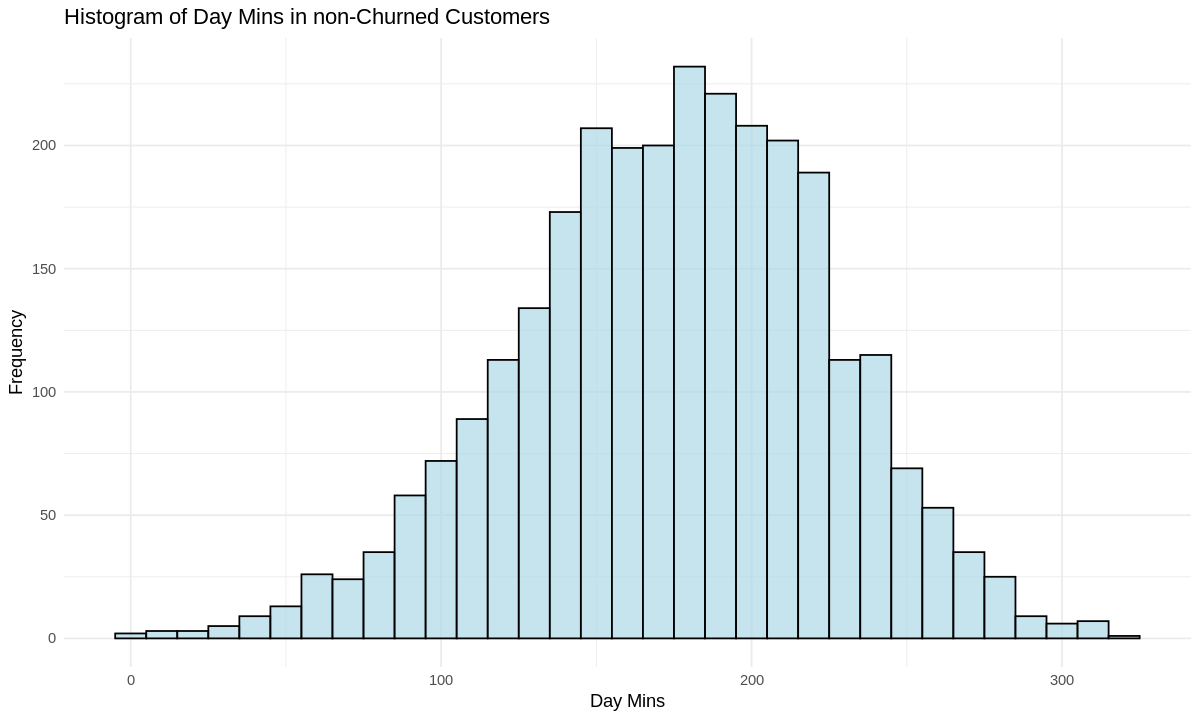

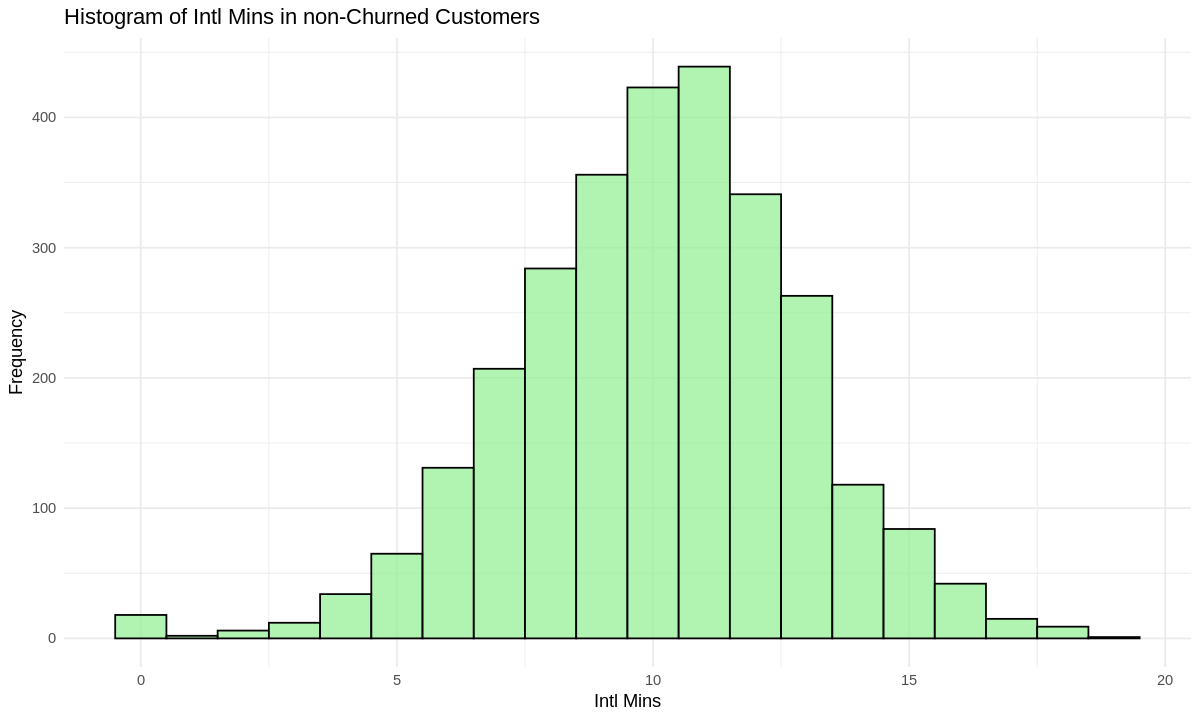

In [ ]:
non_churned_df <- df %>% filter(Churn. == "False.")

ggplot(non_churned_df, aes(x = Day.Mins)) +
  geom_histogram(binwidth = 10, fill = "lightblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Day Mins in non-Churned Customers",
       x = "Day Mins", y = "Frequency") +
  theme_minimal()

ggplot(non_churned_df, aes(x = Intl.Mins)) +
  geom_histogram(binwidth = 1, fill = "lightgreen", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Intl Mins in non-Churned Customers",
       x = "Intl Mins", y = "Frequency") +
  theme_minimal()

#### 4. Questions

* **Do customers with international or voicemail plans tend to churn
more or less?**

We saw that customers with international plans tend to churn much more but customers with voicemail plans tend to churn less.

* **Is there a relationship between customer service call frequency and
churn?**

From the diagram, it can be concluded that the more the number of customer service calls, the more the churn rate.

* **Do high-usage customers show higher churn rates?**

No. The distribution of high-usage metrics show is almost normal and in churned customer the usage of these metrics would be low or high and there is no big difference.





### Step 6: Scatter Plot Analysis

#### 1. Usage Features Correlation

Now we create scatter plots to visualize the relationship
between pairs of usage features.

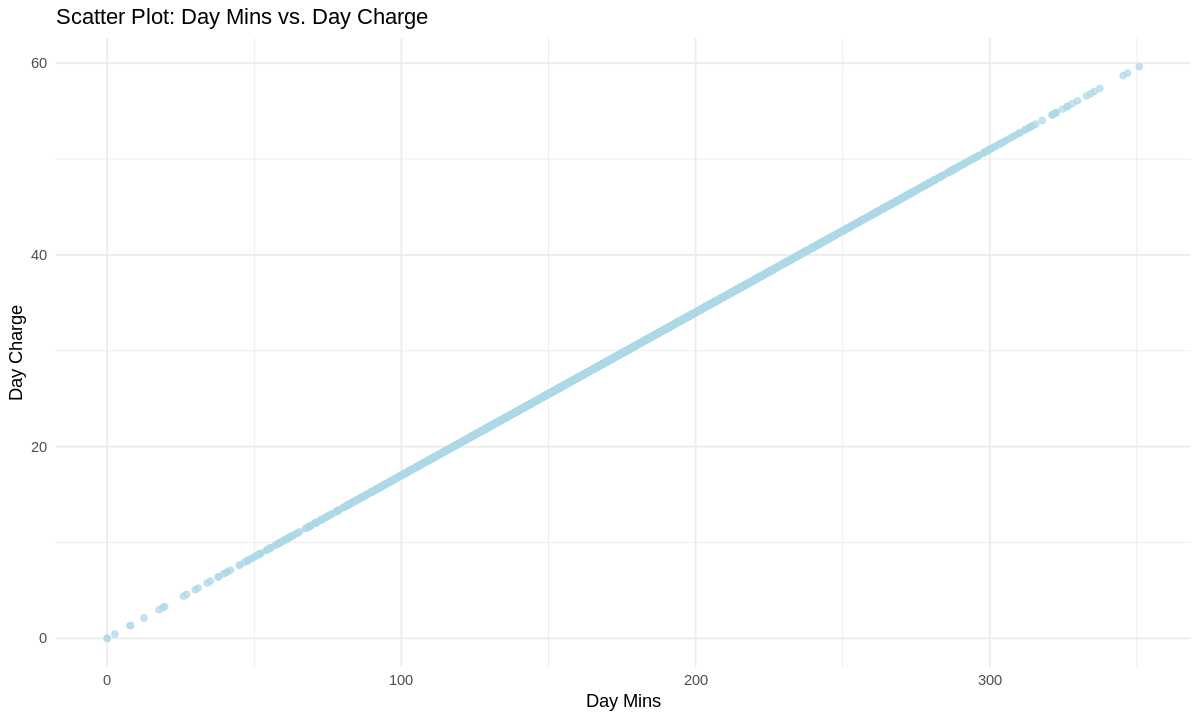

In [ ]:
ggplot(df, aes(x = Day.Mins, y = Day.Charge)) +
  geom_point(color = "lightblue", alpha = 0.7) +
  labs(title = "Scatter Plot: Day Mins vs. Day Charge",
       x = "Day Mins", y = "Day Charge") +
  theme_minimal()

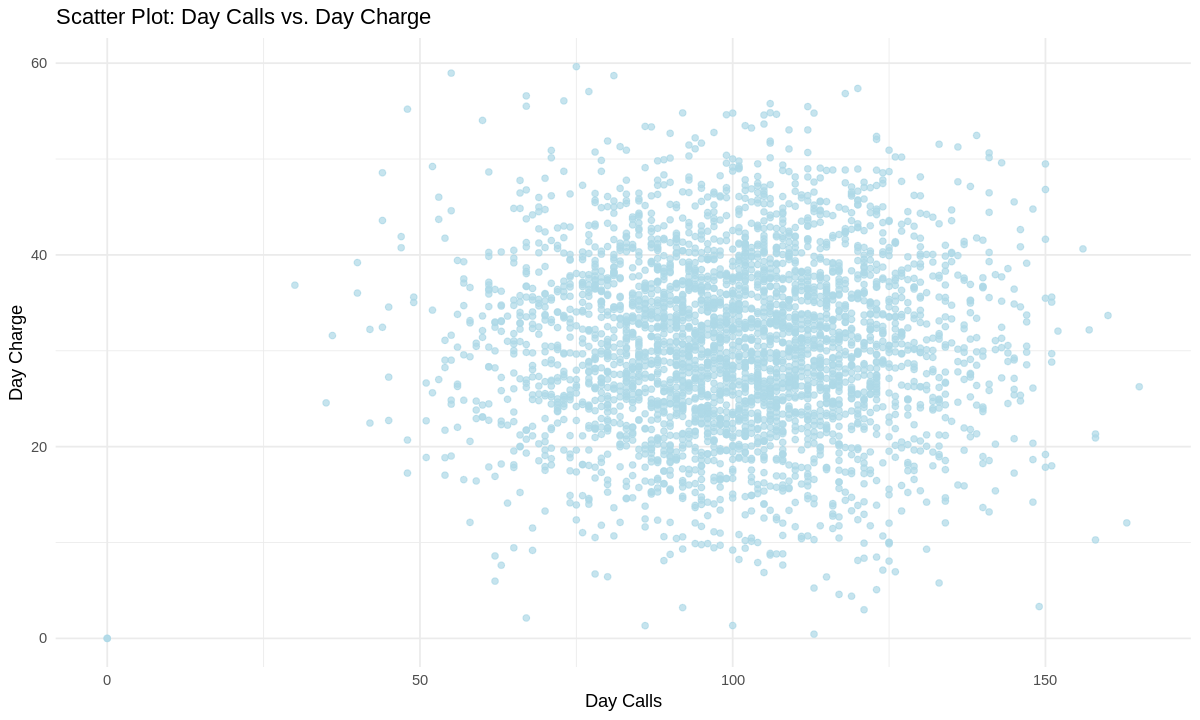

In [ ]:
ggplot(df, aes(x = Day.Calls, y = Day.Charge)) +
  geom_point(color = "lightblue", alpha = 0.7) +
  labs(title = "Scatter Plot: Day Calls vs. Day Charge",
       x = "Day Calls", y = "Day Charge") +
  theme_minimal()

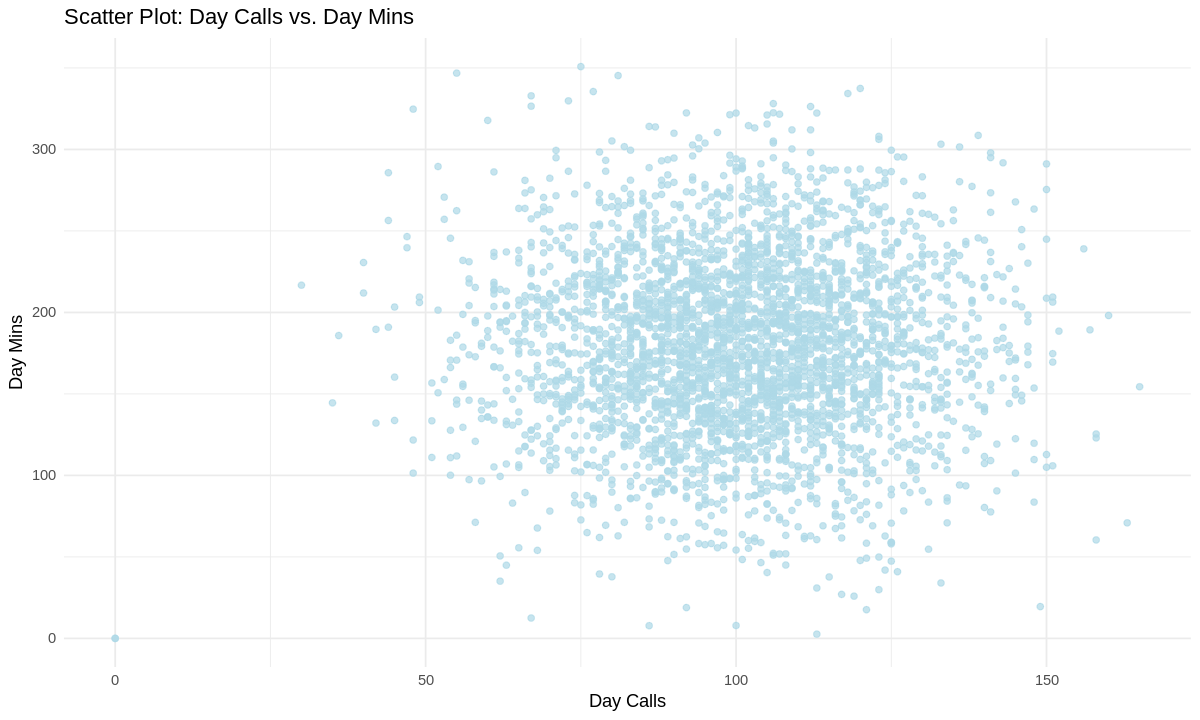

In [ ]:
ggplot(df, aes(x = Day.Calls, y = Day.Mins)) +
  geom_point(color = "lightblue", alpha = 0.7) +
  labs(title = "Scatter Plot: Day Calls vs. Day Mins",
       x = "Day Calls", y = "Day Mins") +
  theme_minimal()

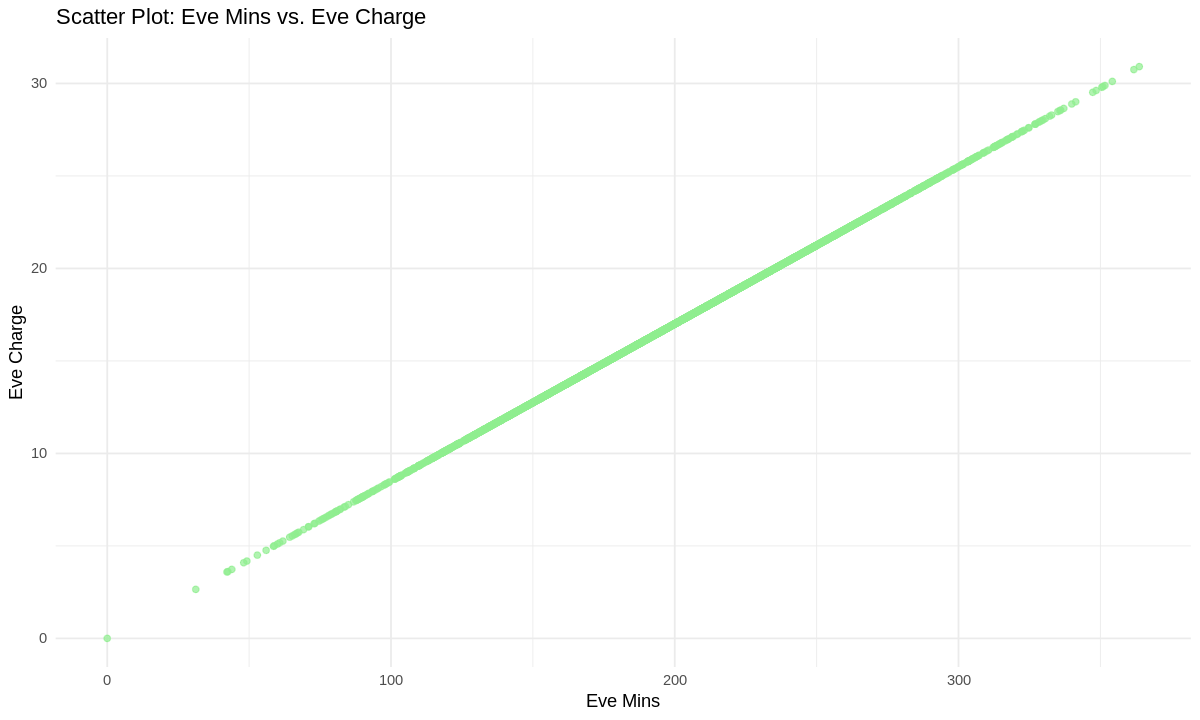

In [ ]:
ggplot(df, aes(x = Eve.Mins, y = Eve.Charge)) +
  geom_point(color = "lightgreen", alpha = 0.7) +
  labs(title = "Scatter Plot: Eve Mins vs. Eve Charge",
       x = "Eve Mins", y = "Eve Charge") +
  theme_minimal()

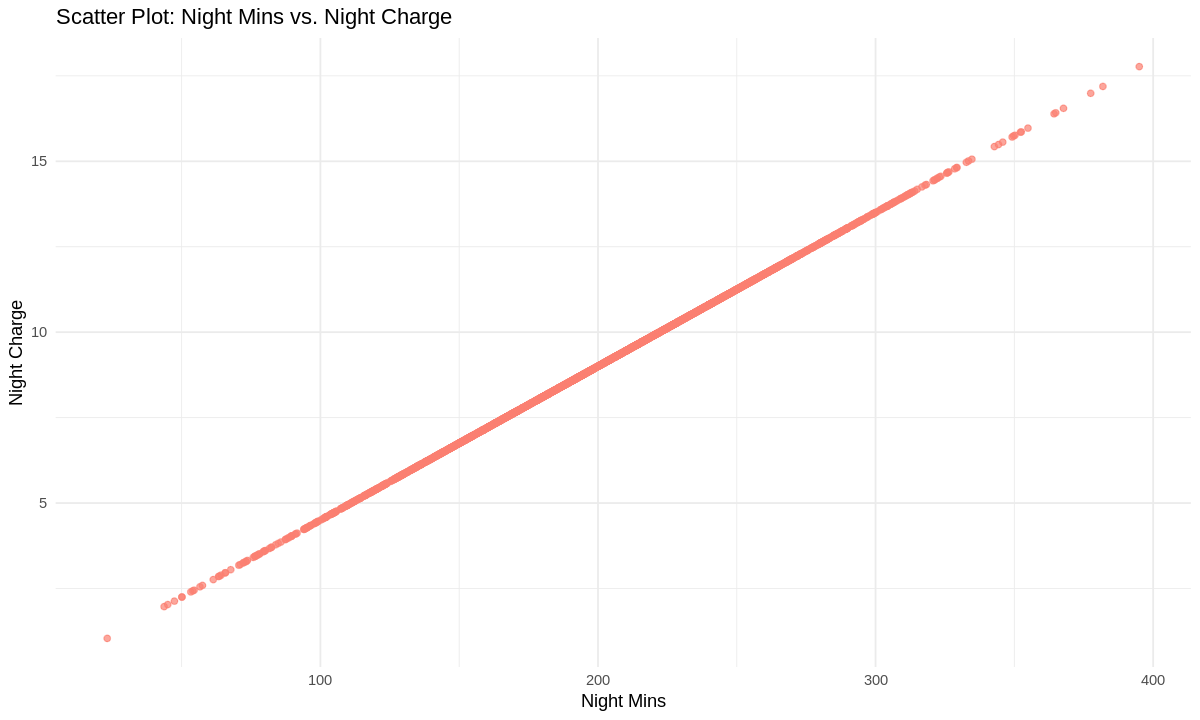

In [ ]:
ggplot(df, aes(x = Night.Mins, y = Night.Charge)) +
  geom_point(color = "salmon", alpha = 0.7) +
  labs(title = "Scatter Plot: Night Mins vs. Night Charge",
       x = "Night Mins", y = "Night Charge") +
  theme_minimal()

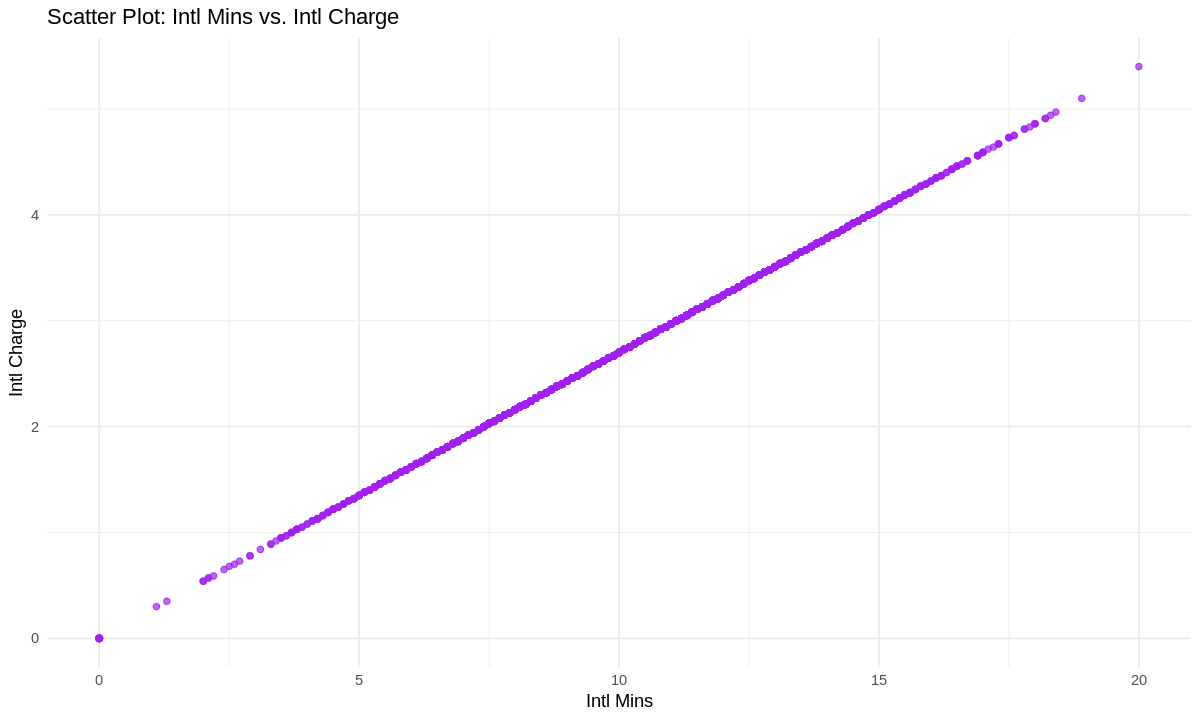

In [ ]:
ggplot(df, aes(x = Intl.Mins, y = Intl.Charge)) +
  geom_point(color = "purple", alpha = 0.7) +
  labs(title = "Scatter Plot: Intl Mins vs. Intl Charge",
       x = "Intl Mins", y = "Intl Charge") +
  theme_minimal()

#### 2. Churn Highlighting

Then we color the points by churn status to observe if certain
patterns emerge between these features for churned and non-churned
customers.

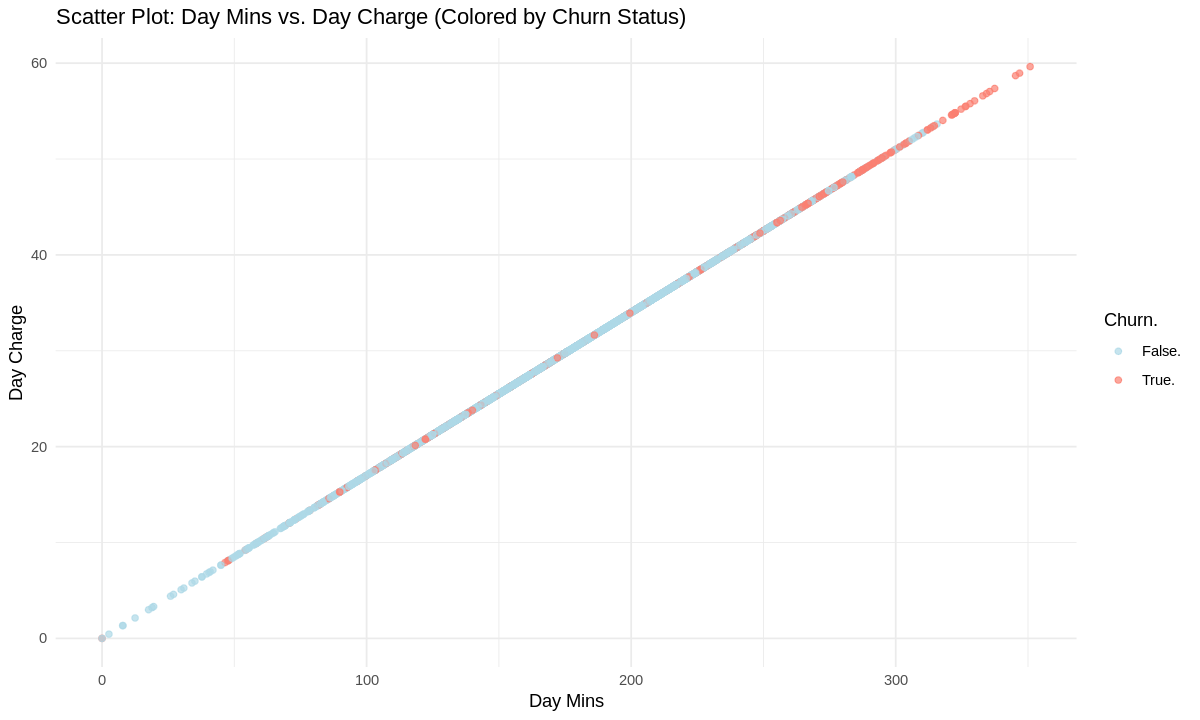

In [ ]:
ggplot(df, aes(x = Day.Mins, y = Day.Charge, color = Churn.)) +
  geom_point(alpha = 0.7) +
  labs(title = "Scatter Plot: Day Mins vs. Day Charge (Colored by Churn Status)",
       x = "Day Mins", y = "Day Charge") +
  scale_color_manual(values = c("False." = "lightblue", "True." = "salmon")) +
  theme_minimal()

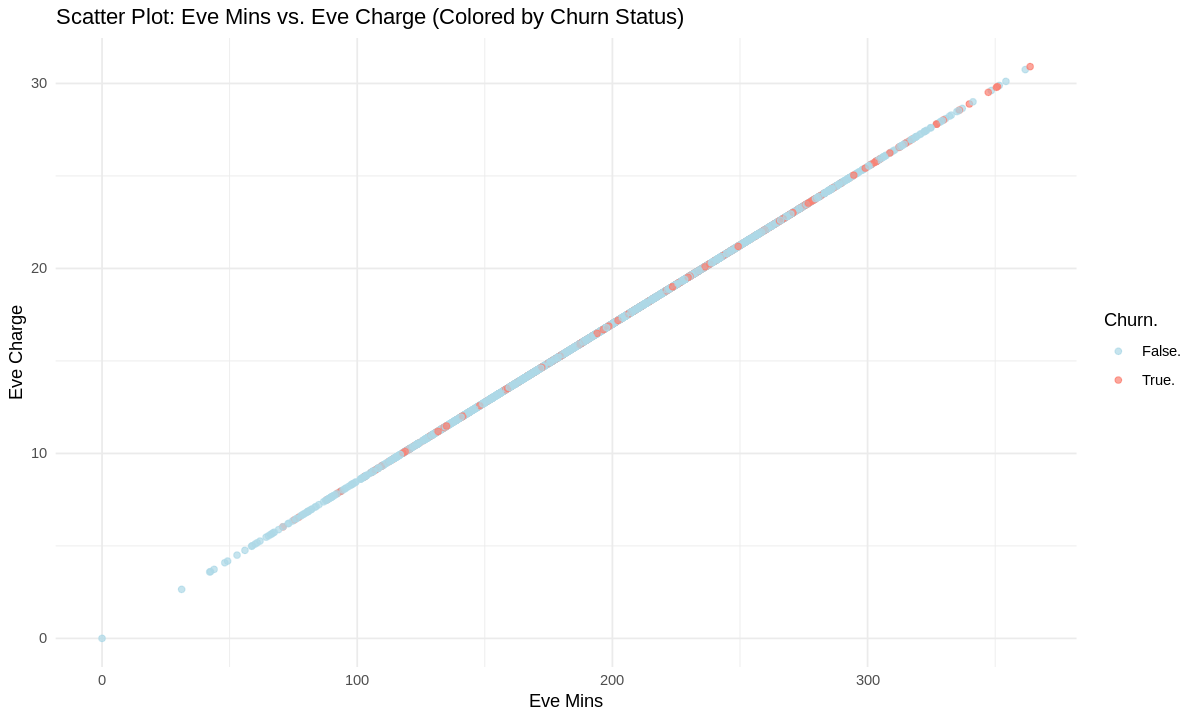

In [ ]:
ggplot(df, aes(x = Eve.Mins, y = Eve.Charge, color = Churn.)) +
  geom_point(alpha = 0.7) +
  labs(title = "Scatter Plot: Eve Mins vs. Eve Charge (Colored by Churn Status)",
       x = "Eve Mins", y = "Eve Charge") +
  scale_color_manual(values = c("False." = "lightblue", "True." = "salmon")) +
  theme_minimal()

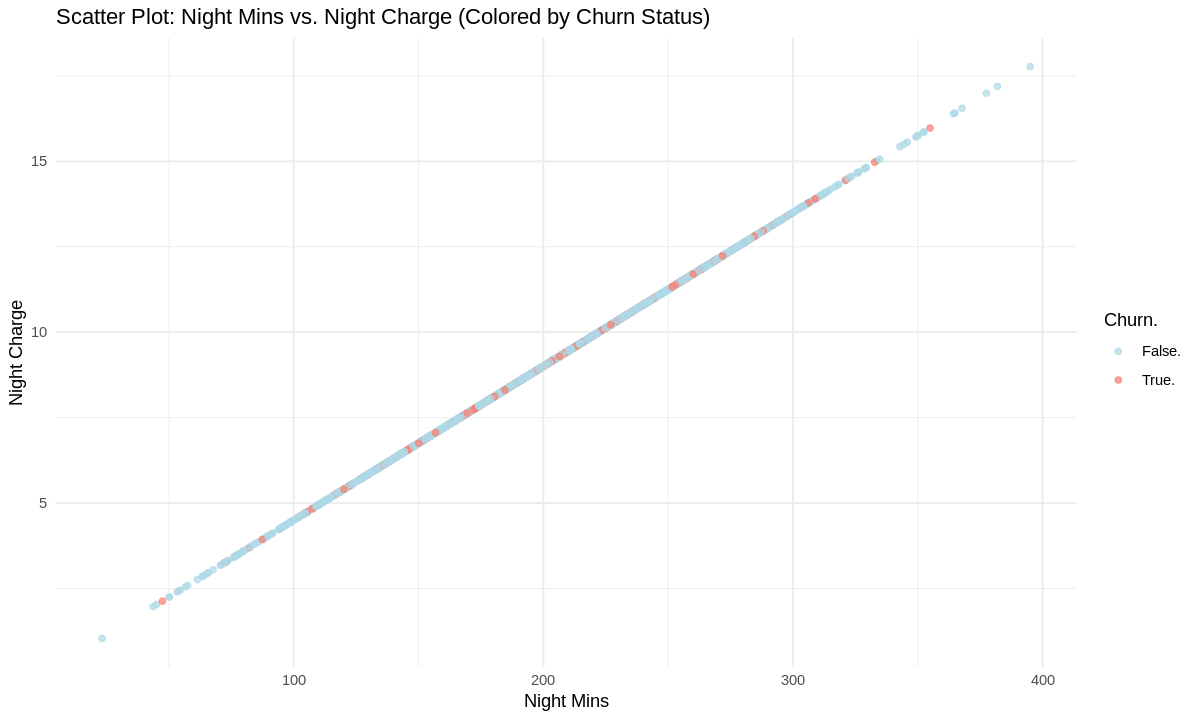

In [ ]:
ggplot(df, aes(x = Night.Mins, y = Night.Charge, color = Churn.)) +
  geom_point(alpha = 0.7) +
  labs(title = "Scatter Plot: Night Mins vs. Night Charge (Colored by Churn Status)",
       x = "Night Mins", y = "Night Charge") +
  scale_color_manual(values = c("False." = "lightblue", "True." = "salmon")) +
  theme_minimal()

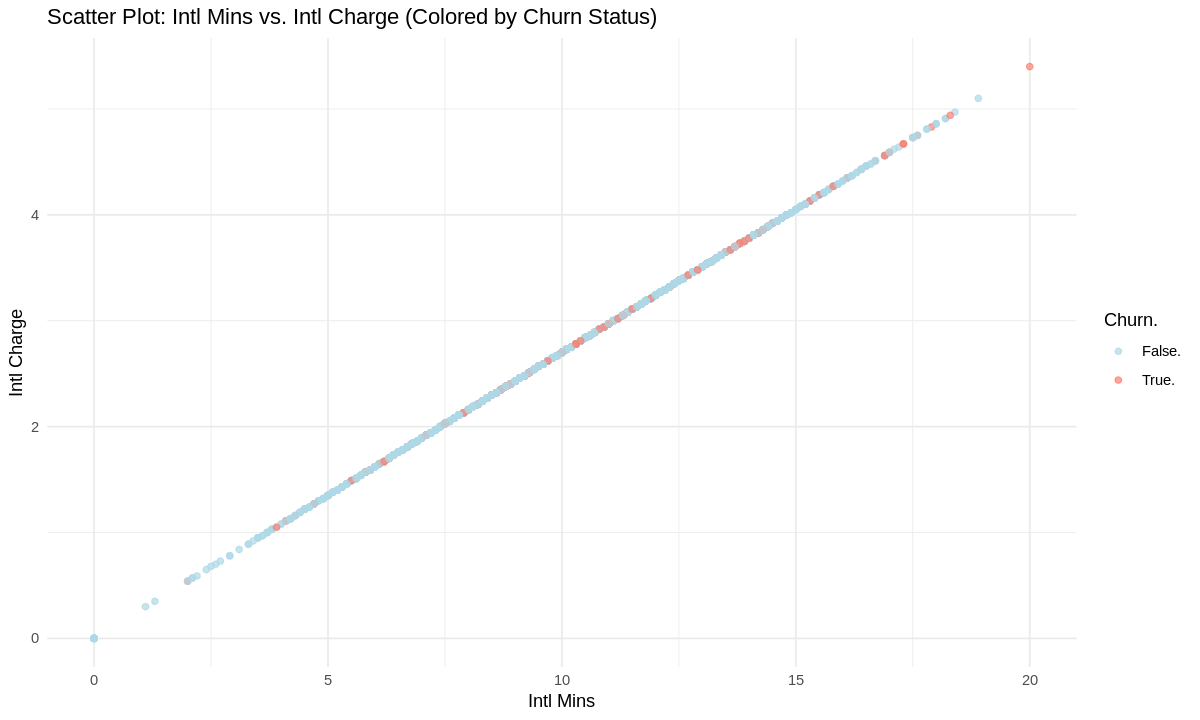

In [ ]:
ggplot(df, aes(x = Intl.Mins, y = Intl.Charge, color = Churn.)) +
  geom_point(alpha = 0.7) +
  labs(title = "Scatter Plot: Intl Mins vs. Intl Charge (Colored by Churn Status)",
       x = "Intl Mins", y = "Intl Charge") +
  scale_color_manual(values = c("False." = "lightblue", "True." = "salmon")) +
  theme_minimal()

#### 3. Questions

* **Is there a direct linear relationship between minutes used and charges?
(This can help verify feature accuracy or identify outliers.)**

Yes. In all of the usage features eg. Day, Eve, Night and Intl there is a linear relationship between Mins and Charges so one of the columns would be enough.

* **Do certain usage patterns distinguish churned customers from nonchurned
customers?**

In Day.Charges and Day.Mins yes. There is a cutoff that after that most of the customers have chrned but in other features there is no such pattern.



### Step 7: Draw Conclusions

#### 1. Summarize Insights

Based on our findings, we list the main factors that
seem to influence customer churn.

* It seems that Intl.Plan highly impacts on decision of churn. The churn rate in customers with Intl.Plan is almost 40 %.
* Number of customer service calls might also impact. Most of more than 2.5 customer service calls have churned.
* Day.Mins and Day.Calls influence on customer churn. Most of the Day.Mins bigger than 250 and most of the Day.Charge after 42 have been churned.



#### 2. Interpret Trends

Now we want to find out why these features might impact churn.

If the customers have more than specific customer service calls, it means that they're not satisfied and have problems and because of that they call customer service and its a great sign that shows they might churn.
Also if the customers have more than specific DAy.Mins and Day.Charge they may be dissatisfied because of the cost and therfore they churn.